In [1]:
#import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [3]:
#from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE ,RFECV
from sklearn.feature_selection import SelectKBest,SelectPercentile,chi2

In [4]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,precision_recall_curve
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split,StratifiedKFold

In [5]:
from six import StringIO

In [6]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [7]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from graphviz import Digraph

In [8]:
location=pd.read_csv("C:/Users/Melaku/Desktop/Thesis_02/csv/location.csv",sep=',',index_col='hhid')
part_5=pd.read_csv("C:/Users/Melaku/Desktop/Thesis_02/csv/lab_part_5.csv",sep=',',index_col='hhid')
familly_status=pd.read_csv("C:/Users/Melaku/Desktop/Thesis_02/csv/lab_familly.csv",sep=',',index_col='hhid')
part_3_4=pd.read_csv("C:/Users/Melaku/Desktop/Thesis_02/csv/labeled_part_3_4.csv",sep=',',index_col='hhid')

In [9]:
location.head()

,longitude,latitude,altitude,kebele
hhid,,,,
DT1301562,37.87093,12.97442,2,DT13
DT1301557,37.88640,12.93405,2,DT13
DT1301547,37.88641,12.98617,2,DT13
DT1301544,37.99801,12.99192,2,DT13
DT1301543,37.89623,12.99023,2,DT13


In [10]:
location.shape

(21293, 4)

In [11]:
familly_status.head()

,hh_members,sex,relation,hh_education,main_occupation,marital_status,residence,age
hhid,,,,,,,,
DT0100002,1,1,1,0.0,2.0,1.0,0,1.0
DT0100005,1,1,1,1.0,3.0,1.0,0,1.0
DT0100006,0,1,1,3.0,4.0,1.0,0,1.0
DT0100007,0,1,1,3.0,4.0,1.0,0,1.0
DT0100011,0,1,1,3.0,2.0,2.0,0,0.0


In [12]:
familly_status.shape

(16082, 8)

In [13]:
part_3_4.isnull().sum().sum()

0

In [14]:
part_3_4.shape

(15887, 21)

In [15]:
fam_loc=familly_status.merge(location,on=['hhid'], how='right')

In [16]:
fam_loc.shape

(21376, 12)

In [17]:
fam_loc.dropna(how='any',axis=0,inplace=True)

In [18]:
part_3_4.shape

(15887, 21)

In [19]:
fam_loc_part_3_4=fam_loc.merge(part_3_4,on=['hhid'], how='right')

In [20]:
fam_loc_part_3_4.shape

(15961, 33)

In [21]:
fam_loc_part_3_4.isnull().sum()

hh_members         1043
sex                1043
relation           1043
hh_education       1043
main_occupation    1043
marital_status     1043
residence          1043
age                1043
longitude          1043
latitude           1043
altitude           1043
kebele             1043
Q401                  0
Q406                  0
Q301                  0
Q302                  0
Q304                  0
Q306                  0
Q307                  0
Q308m                 0
Qsou_inform           0
Q3098                 0
Q3099                 0
Q30910                0
Q30911                0
Q3098n                0
Q3099n                0
Q30910n               0
Q30911n               0
Q30912n               0
Q30913n               0
Q30914n               0
Q30915n               0
dtype: int64

In [22]:
fam_loc_part_3_4.dropna(how='any',axis=0,inplace=True)

In [23]:
fam_loc_part_3_4.shape

(14918, 33)

In [24]:
fam_loc_part_3_4_5=fam_loc_part_3_4.merge(part_5,on=['hhid'],how='right')

In [25]:
fam_loc_part_3_4_5.head()

,hh_members,sex,relation,hh_education,main_occupation,marital_status,residence,age,longitude,latitude,...,Q5231,Q5232,Q5233,Q5234,Q524,Q525,Q5261,Q5262,Q5263,Q5264
hhid,,,,,,,,,,,,,,,,,,,,,
DT0100002,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,37.75431,12.97152,...,1.0,2.0,2.0,2.0,1.0,3.0,1,2,2,2
DT0100005,1.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,37.75393,12.97195,...,1.0,2.0,2.0,2.0,1.0,3.0,2,2,2,2
DT0100006,0.0,1.0,1.0,3.0,4.0,1.0,0.0,1.0,37.75296,12.97274,...,2.0,2.0,2.0,2.0,1.0,3.0,2,2,2,2
DT0100007,0.0,1.0,1.0,3.0,4.0,1.0,0.0,1.0,37.75296,12.97276,...,2.0,2.0,2.0,2.0,1.0,3.0,1,2,2,2
DT0100011,0.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,37.75465,12.97211,...,1.0,2.0,2.0,2.0,1.0,2.0,1,2,2,2


In [26]:
part_5.shape

(15473, 32)

In [27]:
fam_loc_part_3_4_5.shape

(15550, 65)

In [28]:
fam_loc_part_3_4_5.isnull().sum().sum()

33363

In [29]:
fam_loc_part_3_4_5.dropna(how='any',axis=0,inplace=True)

In [30]:
fam_loc_part_3_4_5.duplicated().T.sum()

4

In [31]:
fam_loc_part_3_4_5.drop_duplicates(keep='first',inplace=True)

In [32]:
fam_loc_part_3_4_5.duplicated().sum()

0

In [33]:
fam_loc_part_3_4_5.isnull().sum().sum()

0

In [34]:
fam_loc_part_3_4_5.to_csv("C:/Users/Melaku/Desktop/Thesis_02/csv/merged.csv")

In [35]:
fam_loc_part_3_4_5.shape

(14535, 65)

In [36]:
all_merged=pd.read_csv("C:/Users/Melaku/Desktop/Thesis_02/csv/merged.csv",sep=',',index_col='hhid')

In [37]:
all_merged.sort_index()

,hh_members,sex,relation,hh_education,main_occupation,marital_status,residence,age,longitude,latitude,...,Q5231,Q5232,Q5233,Q5234,Q524,Q525,Q5261,Q5262,Q5263,Q5264
hhid,,,,,,,,,,,,,,,,,,,,,
DT0100002,1.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,37.75431,12.97152,...,1.0,2.0,2.0,2.0,1.0,3.0,1,2,2,2
DT0100005,1.0,1.0,1.0,1.0,3.0,1.0,0.0,1.0,37.75393,12.97195,...,1.0,2.0,2.0,2.0,1.0,3.0,2,2,2,2
DT0100006,0.0,1.0,1.0,3.0,4.0,1.0,0.0,1.0,37.75296,12.97274,...,2.0,2.0,2.0,2.0,1.0,3.0,2,2,2,2
DT0100007,0.0,1.0,1.0,3.0,4.0,1.0,0.0,1.0,37.75296,12.97276,...,2.0,2.0,2.0,2.0,1.0,3.0,1,2,2,2
DT0100011,0.0,1.0,1.0,3.0,2.0,2.0,0.0,0.0,37.75465,12.97211,...,1.0,2.0,2.0,2.0,1.0,2.0,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DT1301282,1.0,0.0,1.0,0.0,2.0,4.0,1.0,1.0,37.86644,13.00022,...,2.0,2.0,2.0,2.0,1.0,3.0,1,2,2,2
DT1301283,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,37.88636,12.99999,...,2.0,2.0,2.0,2.0,1.0,3.0,1,2,2,2
DT1301284,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,37.86644,13.00022,...,1.0,2.0,2.0,2.0,1.0,3.0,1,2,2,2


In [38]:
all_merged.isnull().sum().sum()

0

In [39]:
def deterimine_types_feature(all_merged):
    feature_types=[]
    n_unique_values_threshold=10
    
    for column in all_merged.columns:
        unique_values=all_merged[column].unique()
        example_value=unique_values[0]
        
        if(isinstance(example_value,str)) or (len(unique_values)<=n_unique_values_threshold):
            feature_types.append("category")
        else:
            feature_types.append("continous")
    return feature_types

In [40]:
feature_types=deterimine_types_feature(all_merged)
i=0
for column in all_merged.columns:
    print(column,"-",feature_types[i])
    i+=1

hh_members - category
sex - category
relation - category
hh_education - category
main_occupation - category
marital_status - category
residence - category
age - category
longitude - continous
latitude - continous
altitude - category
kebele - category
Q401 - category
Q406 - category
Q301 - category
Q302 - category
Q304 - category
Q306 - category
Q307 - category
Q308m - category
Qsou_inform - category
Q3098 - category
Q3099 - category
Q30910 - category
Q30911 - category
Q3098n - category
Q3099n - category
Q30910n - category
Q30911n - category
Q30912n - category
Q30913n - category
Q30914n - category
Q30915n - category
Q501 - category
Q503 - category
Q504 - category
Q505 - category
Q506 - category
Q507 - category
Q508 - category
Q509 - category
Q510 - category
Q511 - category
Q512 - category
Q513 - category
Q514 - category
Q515 - category
Q516 - category
Q517 - category
Q518 - category
Q519 - category
Q520 - category
Q521 - category
Q522 - category
Q523 - category
Q5231 - category
Q5232 - 

In [41]:
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14535 entries, DT0100002 to DT1301286
Data columns (total 65 columns):
hh_members         14535 non-null float64
sex                14535 non-null float64
relation           14535 non-null float64
hh_education       14535 non-null float64
main_occupation    14535 non-null float64
marital_status     14535 non-null float64
residence          14535 non-null float64
age                14535 non-null float64
longitude          14535 non-null float64
latitude           14535 non-null float64
altitude           14535 non-null float64
kebele             14535 non-null object
Q401               14535 non-null float64
Q406               14535 non-null float64
Q301               14535 non-null float64
Q302               14535 non-null float64
Q304               14535 non-null float64
Q306               14535 non-null float64
Q307               14535 non-null float64
Q308m              14535 non-null float64
Qsou_inform        14535 non-null float64
Q30

In [42]:
all_merged.dtypes
for x in all_merged:
    if all_merged[x].dtypes == "float":
        all_merged[x] = all_merged[x].astype(int)
        print (all_merged[x].dtypes)

int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32
int32


In [43]:
all_merged.shape

(14535, 65)

In [44]:
Hfias=[]
all_merged.insert(65,'Hfias','NaN')

In [45]:
all_merged['Hfias']=all_merged['Q506'] + all_merged['Q508']+all_merged['Q510']+all_merged['Q512']+all_merged['Q514']+all_merged['Q516']+all_merged['Q518']+all_merged['Q520']+all_merged['Q522']
all_merged['Hfias'].value_counts()

0     6547
12     805
6      744
2      668
10     559
11     530
8      517
9      508
1      492
4      474
3      470
7      429
13     377
5      357
14     239
15     222
16     136
18     123
17     118
19      44
21      41
20      40
24      26
23      22
27      19
25      12
22      11
26       5
Name: Hfias, dtype: int64

In [46]:
hfias=pd.DataFrame(all_merged[['Q506','Q508','Q510','Q512','Q514','Q516','Q518','Q520','Q522','Q525','Q523','kebele']])
all_merged.drop(hfias,axis=1,inplace=True)

In [47]:
all_merged['Hfias'].value_counts()

0     6547
12     805
6      744
2      668
10     559
11     530
8      517
9      508
1      492
4      474
3      470
7      429
13     377
5      357
14     239
15     222
16     136
18     123
17     118
19      44
21      41
20      40
24      26
23      22
27      19
25      12
22      11
26       5
Name: Hfias, dtype: int64

In [48]:
all_merged.shape

(14535, 54)

In [49]:
food_secured=[]
all_merged.insert(54,'food_secured',"NaN")

In [50]:
all_merged.loc[all_merged.Hfias ==0 ,'food_secured'] = 1;
all_merged.loc[all_merged.Hfias >0 ,'food_secured'] = 0;

In [51]:
all_merged['food_secured'].value_counts()

0    7988
1    6547
Name: food_secured, dtype: int64

In [52]:
xx=pd.DataFrame(all_merged[['Hfias']])
all_merged.drop(xx,axis=1,inplace=True)

In [53]:
all_merged['food_secured'].value_counts()

0    7988
1    6547
Name: food_secured, dtype: int64

In [54]:
all_merged.corr(method="spearman")['food_secured'].sort_values(ascending=False)# dispay correlation ascending orders

food_secured       1.000000
Q505               0.903087
Q507               0.796292
Q509               0.769774
Q513               0.676093
Q515               0.641248
Q511               0.532205
Q5231              0.461109
Q5232              0.390988
Qsou_inform        0.286152
Q517               0.262598
hh_education       0.257189
Q30913n            0.238669
Q519               0.238596
Q307               0.208089
Q5233              0.191709
Q308m              0.180168
Q5234              0.177105
Q521               0.170167
main_occupation    0.166126
Q5263              0.154903
Q301               0.131770
Q30912n            0.119571
Q302               0.090476
Q304               0.089749
Q30914n            0.085931
sex                0.059455
altitude           0.039651
Q30915n            0.038559
Q5264              0.035719
Q5262              0.025728
Q524               0.022118
latitude           0.019489
Q30910             0.017893
Q30910n            0.017893
Q3099n             0

In [55]:
# remove Negative corelated and non correlated features 
irrelevant=pd.DataFrame(all_merged[['Q505','Q507','Q509','Q511','Q513','Q515','Q517','Q519','Q521',
                                    'relation','longitude','latitude']])
all_merged.drop(irrelevant,axis=1,inplace=True)

In [56]:
all_merged.corr(method="spearman")['food_secured'].sort_values(ascending=False)# dispay correlation ascending orders

food_secured       1.000000
Q5231              0.461109
Q5232              0.390988
Qsou_inform        0.286152
hh_education       0.257189
Q30913n            0.238669
Q307               0.208089
Q5233              0.191709
Q308m              0.180168
Q5234              0.177105
main_occupation    0.166126
Q5263              0.154903
Q301               0.131770
Q30912n            0.119571
Q302               0.090476
Q304               0.089749
Q30914n            0.085931
sex                0.059455
altitude           0.039651
Q30915n            0.038559
Q5264              0.035719
Q5262              0.025728
Q524               0.022118
Q30910n            0.017893
Q30910             0.017893
Q3099n             0.014646
Q3099              0.013080
Q504              -0.004275
Q3098n            -0.065111
Q3098             -0.065111
marital_status    -0.073360
Q5261             -0.078229
hh_members        -0.083713
Q501              -0.085512
Q30911n           -0.100451
Q30911            -0

In [57]:
no_assets=pd.DataFrame(all_merged[['Q3098', 'Q3099','Q30910','Q30911','Q30912n','Q30913n','Q30914n','Q30915n','Q5262','Q5264']])

In [58]:
#Here numbers of assets are represented in amount,so these may not necessary individually for model development 
all_merged.drop(no_assets,axis=1,inplace=True)

In [59]:
all_merged.head()

,hh_members,sex,hh_education,main_occupation,marital_status,residence,age,altitude,Q401,Q406,...,Q503,Q504,Q5231,Q5232,Q5233,Q5234,Q524,Q5261,Q5263,food_secured
hhid,,,,,,,,,,,,,,,,,,,,,
DT0100002,1,1,0,2,1,0,1,2,1,2,...,2,4,1,2,2,2,1,1,2,0
DT0100005,1,1,1,3,1,0,1,2,1,2,...,2,2,1,2,2,2,1,2,2,0
DT0100006,0,1,3,4,1,0,1,2,1,2,...,0,2,2,2,2,2,1,2,2,1
DT0100007,0,1,3,4,1,0,1,2,1,2,...,0,2,2,2,2,2,1,1,2,0
DT0100011,0,1,3,2,2,0,0,2,1,2,...,2,2,1,2,2,2,1,1,2,0


In [60]:
all_merged.shape

(14535, 32)

In [61]:
all_merged.columns

Index(['hh_members', 'sex', 'hh_education', 'main_occupation',
       'marital_status', 'residence', 'age', 'altitude', 'Q401', 'Q406',
       'Q301', 'Q302', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform',
       'Q3098n', 'Q3099n', 'Q30910n', 'Q30911n', 'Q501', 'Q503', 'Q504',
       'Q5231', 'Q5232', 'Q5233', 'Q5234', 'Q524', 'Q5261', 'Q5263',
       'food_secured'],
      dtype='object')

In [62]:
all_merged.dropna(how='any',inplace=True,axis=0)

In [63]:
all_merged.isnull().sum()

hh_members         0
sex                0
hh_education       0
main_occupation    0
marital_status     0
residence          0
age                0
altitude           0
Q401               0
Q406               0
Q301               0
Q302               0
Q304               0
Q306               0
Q307               0
Q308m              0
Qsou_inform        0
Q3098n             0
Q3099n             0
Q30910n            0
Q30911n            0
Q501               0
Q503               0
Q504               0
Q5231              0
Q5232              0
Q5233              0
Q5234              0
Q524               0
Q5261              0
Q5263              0
food_secured       0
dtype: int64

In [64]:
all_merged.duplicated().sum()

909

In [65]:
all_merged.drop_duplicates(inplace=True)

In [66]:
all_merged.shape

(13626, 32)

In [67]:
all_merged.astype(int)

,hh_members,sex,hh_education,main_occupation,marital_status,residence,age,altitude,Q401,Q406,...,Q503,Q504,Q5231,Q5232,Q5233,Q5234,Q524,Q5261,Q5263,food_secured
hhid,,,,,,,,,,,,,,,,,,,,,
DT0100002,1,1,0,2,1,0,1,2,1,2,...,2,4,1,2,2,2,1,1,2,0
DT0100005,1,1,1,3,1,0,1,2,1,2,...,2,2,1,2,2,2,1,2,2,0
DT0100006,0,1,3,4,1,0,1,2,1,2,...,0,2,2,2,2,2,1,2,2,1
DT0100007,0,1,3,4,1,0,1,2,1,2,...,0,2,2,2,2,2,1,1,2,0
DT0100011,0,1,3,2,2,0,0,2,1,2,...,2,2,1,2,2,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DT1301282,1,0,0,2,4,1,1,2,2,2,...,2,1,2,2,2,2,1,1,2,1
DT1301283,1,1,1,2,1,1,1,2,2,2,...,1,2,2,2,2,2,1,1,2,0
DT1301284,1,1,3,2,1,1,1,2,2,2,...,1,1,1,2,2,2,1,1,2,0


In [68]:
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13626 entries, DT0100002 to DT1301286
Data columns (total 32 columns):
hh_members         13626 non-null int32
sex                13626 non-null int32
hh_education       13626 non-null int32
main_occupation    13626 non-null int32
marital_status     13626 non-null int32
residence          13626 non-null int32
age                13626 non-null int32
altitude           13626 non-null int32
Q401               13626 non-null int32
Q406               13626 non-null int32
Q301               13626 non-null int32
Q302               13626 non-null int32
Q304               13626 non-null int32
Q306               13626 non-null int32
Q307               13626 non-null int32
Q308m              13626 non-null int32
Qsou_inform        13626 non-null int32
Q3098n             13626 non-null int32
Q3099n             13626 non-null int32
Q30910n            13626 non-null int32
Q30911n            13626 non-null int32
Q501               13626 non-null int64
Q503

In [69]:
all_merged.columns

Index(['hh_members', 'sex', 'hh_education', 'main_occupation',
       'marital_status', 'residence', 'age', 'altitude', 'Q401', 'Q406',
       'Q301', 'Q302', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform',
       'Q3098n', 'Q3099n', 'Q30910n', 'Q30911n', 'Q501', 'Q503', 'Q504',
       'Q5231', 'Q5232', 'Q5233', 'Q5234', 'Q524', 'Q5261', 'Q5263',
       'food_secured'],
      dtype='object')

In [70]:
all_merged.shape

(13626, 32)

In [71]:
all_merged['food_secured'].value_counts()

0    7774
1    5852
Name: food_secured, dtype: int64

In [72]:
all_merged.columns

Index(['hh_members', 'sex', 'hh_education', 'main_occupation',
       'marital_status', 'residence', 'age', 'altitude', 'Q401', 'Q406',
       'Q301', 'Q302', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform',
       'Q3098n', 'Q3099n', 'Q30910n', 'Q30911n', 'Q501', 'Q503', 'Q504',
       'Q5231', 'Q5232', 'Q5233', 'Q5234', 'Q524', 'Q5261', 'Q5263',
       'food_secured'],
      dtype='object')

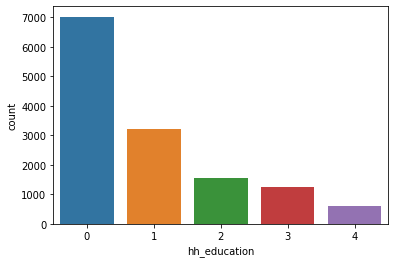

In [73]:
sns.countplot(all_merged['hh_education'])

0    7505
1    5744
2     377
Name: hh_members, dtype: int64

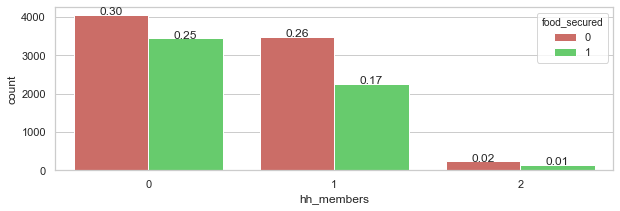

In [74]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="hh_members",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center',)
all_merged['hh_members'].value_counts()

1    9908
0    3718
Name: sex, dtype: int64

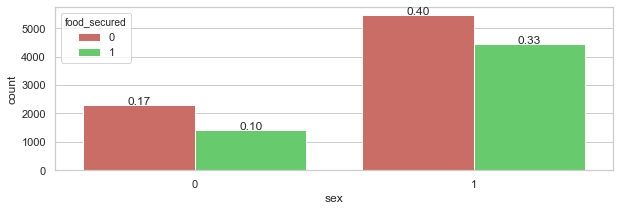

In [75]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="sex",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['sex'].value_counts()

0    7017
1    3218
2    1541
3    1252
4     598
Name: hh_education, dtype: int64

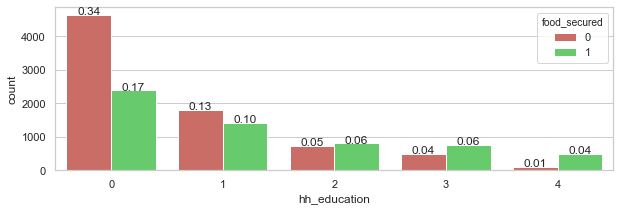

In [76]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="hh_education",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['hh_education'].value_counts()

2    10689
4     1225
3     1143
1      395
0      174
Name: main_occupation, dtype: int64

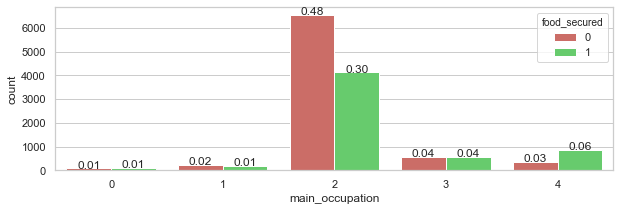

In [77]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="main_occupation",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['main_occupation'].value_counts()

1    9338
4    1799
3    1315
2     689
0     485
Name: marital_status, dtype: int64

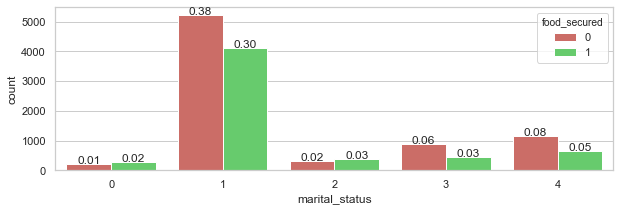

In [78]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="marital_status",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['marital_status'].value_counts()

1    6268
0    5076
2    2282
Name: age, dtype: int64

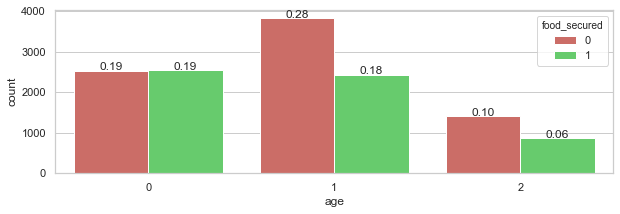

In [79]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="age",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['age'].value_counts()

2    10114
1     2082
0     1430
Name: altitude, dtype: int64

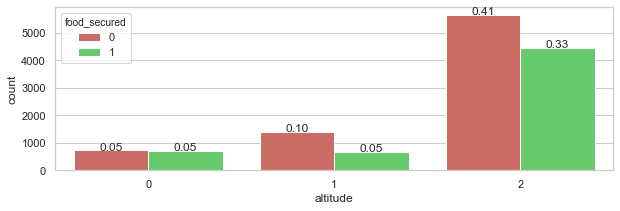

In [80]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="altitude",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['altitude'].value_counts()

2    6995
1    6631
Name: Q401, dtype: int64

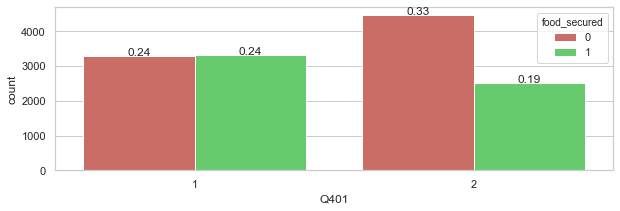

In [81]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q401",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q401'].value_counts()

2    13070
1      556
Name: Q406, dtype: int64

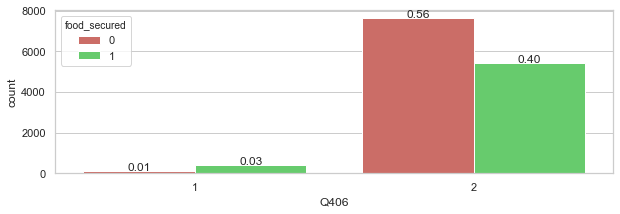

In [82]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q406",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q406'].value_counts()

1    9096
0    4530
Name: residence, dtype: int64

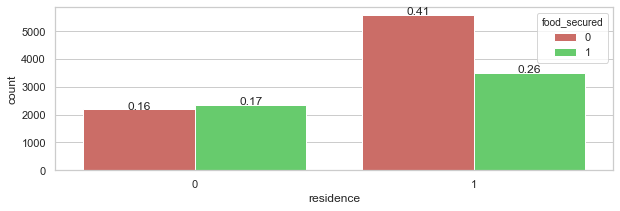

In [83]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="residence",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['residence'].value_counts()

2    13070
1      556
Name: Q406, dtype: int64

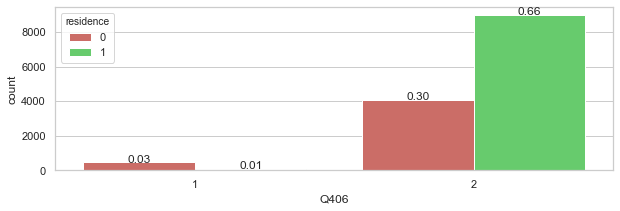

In [84]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q406",hue="residence",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q406'].value_counts()

2    10390
1     3236
Name: Q301, dtype: int64

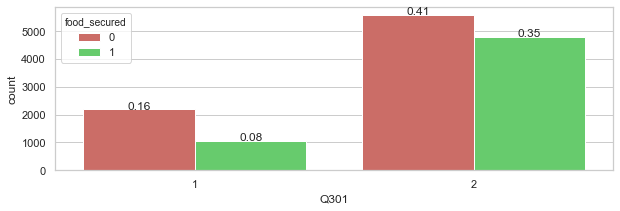

In [85]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q301",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q301'].value_counts()

1    13403
2      223
Name: Q302, dtype: int64

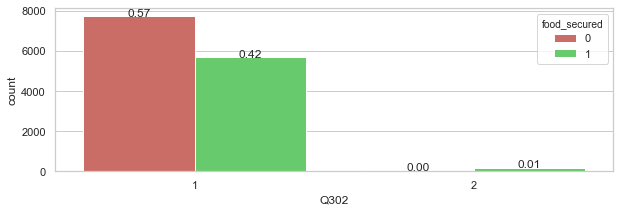

In [86]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q302",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q302'].value_counts()

1    11225
2     1849
3      552
Name: Q304, dtype: int64

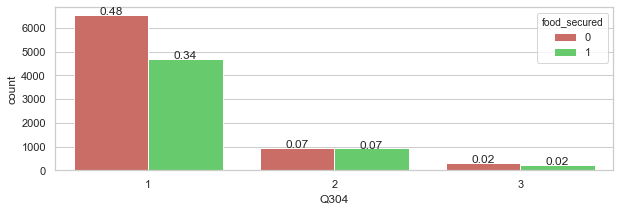

In [87]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q304",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q304'].value_counts()

3    7894
1    4283
4    1364
2      85
Name: Q306, dtype: int64

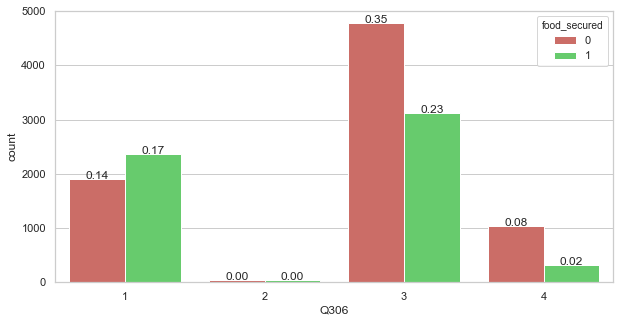

In [88]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.countplot(x="Q306",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q306'].value_counts()

2    9146
3    3298
1    1021
4     161
Name: Q307, dtype: int64

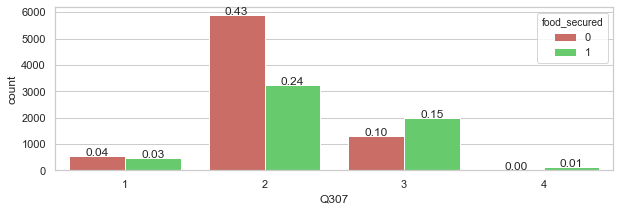

In [89]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q307",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q307'].value_counts()

0    10432
1     3194
Name: Q308m, dtype: int64

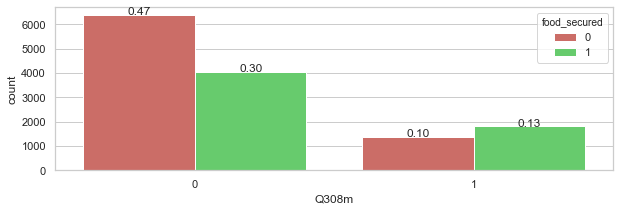

In [90]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q308m",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q308m'].value_counts()

0    8872
1    2991
2    1405
3     358
Name: Qsou_inform, dtype: int64

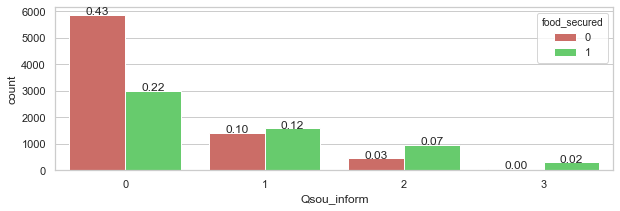

In [91]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Qsou_inform",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Qsou_inform'].value_counts()

2    4686
3    3377
0    3080
1    1735
4     748
Name: Q501, dtype: int64

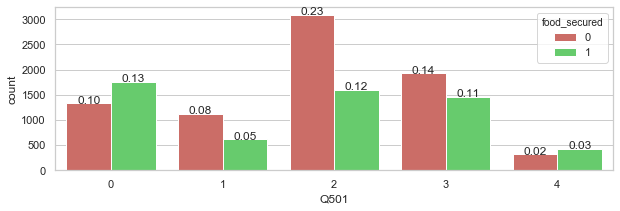

In [92]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q501",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q501'].value_counts()

1    7535
0    3083
2    3008
Name: Q503, dtype: int64

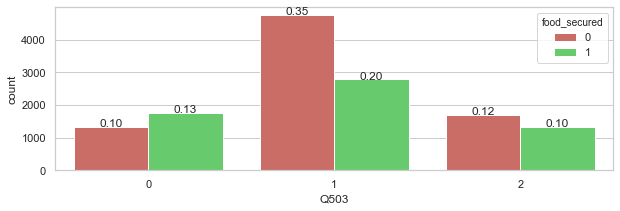

In [93]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q503",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q503'].value_counts()

2    6415
1    5292
4     856
5     743
3     320
Name: Q504, dtype: int64

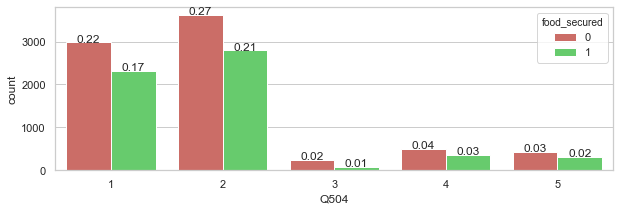

In [94]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q504",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q504'].value_counts()

In [95]:
x=all_merged.drop(['food_secured'],axis=1)
y=all_merged['food_secured']

1    9222
2    4404
Name: Q5261, dtype: int64

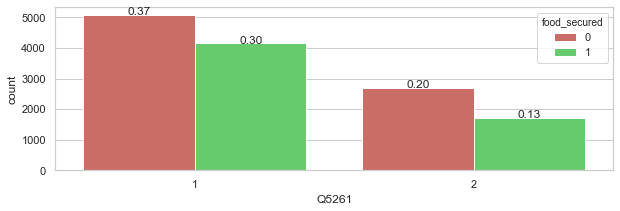

In [96]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q5261",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q5261'].value_counts()

2    12088
1     1538
Name: Q5263, dtype: int64

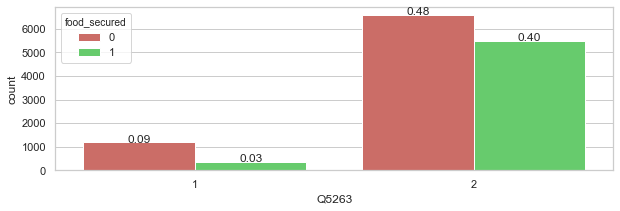

In [97]:
import seaborn as sns
sns.set(style="whitegrid")
sns.set_palette("hls",3)
fig,ax=plt.subplots(figsize=(10,3))
ax=sns.countplot(x="Q5263",hue="food_secured",data=all_merged)
for p in ax.patches:
    height=p.get_height()
    ax.text(p.get_x() +p.get_width()/2.,
            height +3,
            '{:1.2f}'.format(height/all_merged.shape[0]),
            ha='center')
all_merged['Q5263'].value_counts()

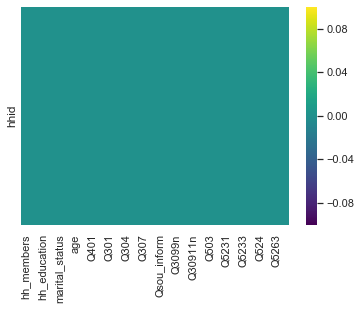

In [98]:
sns.heatmap(all_merged.isnull(),yticklabels=False,cmap='viridis')

In [99]:
#Here again we identify both independet and depedent variables in to x and y
x=all_merged.drop(['food_secured'],axis=1)
y=all_merged['food_secured']

In [102]:
#Split the dataset into train and test set 
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2,random_state=0,stratify=y)

In [103]:
#from sklearn.model_selection import StratifiedKFold
#x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2,random_state=0,shuffle=True)
#skf=StratifiedKFold(n_splits=10)
#skf.get_n_splits(x,y)
#print(skf)

In [104]:
#for train_index,test_index in skf.split(x,y):
#    print("train:",train_index,"test:",test_index)

In [105]:
print(x_train.shape,x_test.shape)#show shape of X_train and Y_train 

(10900, 31) (2726, 31)


In [106]:
print(y_train.shape,y_test.shape)

(10900,) (2726,)


In [108]:
all_merged.columns

Index(['hh_members', 'sex', 'hh_education', 'main_occupation',
       'marital_status', 'residence', 'age', 'altitude', 'Q401', 'Q406',
       'Q301', 'Q302', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform',
       'Q3098n', 'Q3099n', 'Q30910n', 'Q30911n', 'Q501', 'Q503', 'Q504',
       'Q5231', 'Q5232', 'Q5233', 'Q5234', 'Q524', 'Q5261', 'Q5263',
       'food_secured'],
      dtype='object')

In [109]:
all_merged.shape

(13626, 32)

In [110]:
all_merged.duplicated().sum()

0

In [111]:
all_merged.drop_duplicates(inplace=True)

In [112]:
print(" Rows :",all_merged.shape[0])
print(" columns :",all_merged.shape[1])
print(" \n features : \n" ,all_merged.columns.tolist())
print("\n unique values  : \n" ,all_merged.nunique())

 Rows : 13626
 columns : 32
 
 features : 
 ['hh_members', 'sex', 'hh_education', 'main_occupation', 'marital_status', 'residence', 'age', 'altitude', 'Q401', 'Q406', 'Q301', 'Q302', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform', 'Q3098n', 'Q3099n', 'Q30910n', 'Q30911n', 'Q501', 'Q503', 'Q504', 'Q5231', 'Q5232', 'Q5233', 'Q5234', 'Q524', 'Q5261', 'Q5263', 'food_secured']

 unique values  : 
 hh_members         3
sex                2
hh_education       5
main_occupation    5
marital_status     5
residence          2
age                3
altitude           3
Q401               2
Q406               2
Q301               2
Q302               2
Q304               3
Q306               4
Q307               4
Q308m              2
Qsou_inform        4
Q3098n             2
Q3099n             3
Q30910n            2
Q30911n            2
Q501               5
Q503               3
Q504               5
Q5231              2
Q5232              2
Q5233              2
Q5234              2
Q524            

In [113]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets as datasets
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

import pandas as pd
import pydotplus

from IPython.display import Image

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2,max_leaf_nodes=20)
dtree.fit(x_train,y_train)

dot_data = StringIO()
export_graphviz(
    dtree, 
    out_file = dot_data,
    filled = True, 
    rounded = True,
    feature_names=x_train.columns,
    class_names=['0','1'],
    special_characters = True
)
graph_1 = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph_1.create_png())
graph_1.write_png('dt_best_5.png')


True

In [114]:
all_merged.columns

Index(['hh_members', 'sex', 'hh_education', 'main_occupation',
       'marital_status', 'residence', 'age', 'altitude', 'Q401', 'Q406',
       'Q301', 'Q302', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform',
       'Q3098n', 'Q3099n', 'Q30910n', 'Q30911n', 'Q501', 'Q503', 'Q504',
       'Q5231', 'Q5232', 'Q5233', 'Q5234', 'Q524', 'Q5261', 'Q5263',
       'food_secured'],
      dtype='object')

In [115]:
all_merged.shape

(13626, 32)

In [116]:
from sklearn import metrics
k_range=range(1,33)
scores=[]
for index in k_range:
    rfe_rf=RFE(RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=123,max_depth=10,max_leaf_nodes=30),n_features_to_select=index)
    rfe_rf.fit(x_train,y_train.values.ravel())
    y_rfe_rf=rfe_rf.predict(x_test)
    print("Selcted feature :",index)
   # scores.append(metrics.accuracy_score(y_test,y_pred))
    print (metrics.accuracy_score(y_test,y_rfe_rf))
    print()

Selcted feature : 1
0.6522377109317682

Selcted feature : 2
0.7556859867938371

Selcted feature : 3
0.7556859867938371

Selcted feature : 4
0.7743947175348496

Selcted feature : 5
0.7909024211298606

Selcted feature : 6
0.7909024211298606

Selcted feature : 7
0.7909024211298606

Selcted feature : 8
0.7909024211298606

Selcted feature : 9
0.7912692589875275

Selcted feature : 10
0.7912692589875275

Selcted feature : 11
0.7956713132795304

Selcted feature : 12
0.7993396918561996

Selcted feature : 13
0.7953044754218636

Selcted feature : 14
0.7978723404255319

Selcted feature : 15
0.7982391782831988

Selcted feature : 16
0.7967718268525312

Selcted feature : 17
0.7993396918561996

Selcted feature : 18
0.801540719002201

Selcted feature : 19
0.7953044754218636

Selcted feature : 20
0.7971386647101981

Selcted feature : 21
0.7956713132795304

Selcted feature : 22
0.7978723404255319

Selcted feature : 23
0.7945707997065297

Selcted feature : 24
0.7982391782831988

Selcted feature : 25
0.794

Mutual Information

In [117]:
# import mutual_info_classif,SelectKBest,chi2 and select feature using SelectKBest and mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest,chi2
best_mi=SelectKBest(score_func=mutual_info_classif,k=18)
fit_skb_mi=best_mi.fit(x_train,y_train.values.ravel())

In [118]:
# display both best features and their mi scores
mi_scores=pd.DataFrame(fit_skb_mi.scores_)
mi_columns=pd.DataFrame(x_train.columns)

In [119]:
#concat both features and their mi_scores incase of columns
feat_mi_score=pd.concat([mi_columns,mi_scores],axis=1)

In [120]:
#display columns and mi scores
feat_mi_score.columns=["mutual_info","scores"]
feat_mi_score

,mutual_info,scores
0,hh_members,0.002159
1,sex,0.011637
2,hh_education,0.027239
3,main_occupation,0.016688
4,marital_status,0.005202
5,residence,0.012541
6,age,0.000075
7,altitude,0.004483
8,Q401,0.009061
9,Q406,0.012013


In [121]:
# select maximum of the largest 18 features depending upon their mi_scores
f_mi_score=feat_mi_score.nlargest(18,'scores')
f_mi_score

,mutual_info,scores
24,Q5231,0.136947
25,Q5232,0.104270
16,Qsou_inform,0.035698
21,Q501,0.028168
2,hh_education,0.027239
14,Q307,0.024964
26,Q5233,0.017513
13,Q306,0.017000
3,main_occupation,0.016688
5,residence,0.012541


In [122]:
#dsiplay best selected features in mi scores
mi_best=x_train.columns[best_mi.get_support()]
mi_best

Index(['sex', 'hh_education', 'main_occupation', 'marital_status', 'residence',
       'Q401', 'Q406', 'Q302', 'Q306', 'Q307', 'Q308m', 'Qsou_inform', 'Q501',
       'Q503', 'Q5231', 'Q5232', 'Q5233', 'Q5234'],
      dtype='object')

In [123]:
#using the mi_best features,aply the train and test set
x_train_mi_fc=x_train[mi_best]
x_test_mi_fc=x_test[mi_best]

In [124]:
x_train_mi_fc

,sex,hh_education,main_occupation,marital_status,residence,Q401,Q406,Q302,Q306,Q307,Q308m,Qsou_inform,Q501,Q503,Q5231,Q5232,Q5233,Q5234
hhid,,,,,,,,,,,,,,,,,,
DT0800876,1,1,2,1,1,2,2,1,3,1,0,0,3,1,2,2,2,2
DT0900342,0,0,2,4,1,1,2,1,1,3,1,0,2,2,2,1,2,2
DT0601029,1,0,2,1,0,1,2,1,3,2,0,0,4,2,2,2,2,2
DT1200091,1,0,2,1,1,2,2,1,3,2,0,0,3,2,2,2,2,2
DT0701099,1,0,2,1,1,2,2,1,3,2,0,0,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DT0501045,1,1,2,1,1,1,2,1,4,2,0,0,3,2,2,2,2,2
DT1101228,1,3,3,1,0,1,2,1,1,2,1,1,0,0,2,2,2,2
DT0800150,1,0,2,1,1,2,2,1,3,2,0,1,3,1,2,2,2,2


In [125]:
#import model selctiom metrics
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict,cross_validate,GridSearchCV

In [126]:
#import random forest classifier from sklearn_ensemble
from sklearn.ensemble import RandomForestClassifier

In [127]:
RandomForestClassifier()

RandomForestClassifier()

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
rf_mi=RandomForestClassifier()

In [129]:
'''grid_search={
        'n_estimators':[100,200,300,400],
         'criterion':['gini','entropy'],
         'bootstrap': [True,False]}
         #'max_depth':list(range(2,16)),
        # 'max_leaf_nodes':[50,70,100]
        #}'''

"grid_search={\n        'n_estimators':[100,200,300,400],\n         'criterion':['gini','entropy'],\n         'bootstrap': [True,False]}\n         #'max_depth':list(range(2,16)),\n        # 'max_leaf_nodes':[50,70,100]\n        #}"

In [130]:
'''# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_mi_fc = GridSearchCV(estimator = rf, param_grid = grid_search, 
                                scoring='accuracy',
                                cv = 10,n_jobs=-1)'''

"# Create a based model\nrf = RandomForestClassifier()\n# Instantiate the grid search model\nrf_mi_fc = GridSearchCV(estimator = rf, param_grid = grid_search, \n                                scoring='accuracy',\n                                cv = 10,n_jobs=-1)"

In [131]:
#rf_mi_fc.fit(x_train_mi_fc,y_train.values.ravel())

In [132]:
'''best_parameters=rf_mi_fc.best_params_
best_parameters'''

'best_parameters=rf_mi_fc.best_params_\nbest_parameters'

In [133]:
'''best_result=rf_mi_fc.best_score_
best_result'''

'best_result=rf_mi_fc.best_score_\nbest_result'

In [134]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [135]:
#def run_randomForest(x_train_mi_fc,x_test_mi_fc,y_train,y_test):
#import random forest classifier from sklearn_ensemble
from sklearn.ensemble import RandomForestClassifier
#deterimne the paramets in randomforest classifiers
rf_mi_fc=RandomForestClassifier(bootstrap=True,n_estimators=100,criterion="entropy",max_depth=10,max_leaf_nodes=20,random_state=42)
#fit the train in case of mutual info classifiers
rf_mi_fc.fit(x_train_mi_fc,y_train.values.ravel())
#predict the model
rf_mi=rf_mi_fc.predict(x_test_mi_fc)
#display the accuracy of the model in case of RF
print(metrics.accuracy_score(y_test,rf_mi))

0.7923697725605282


In [136]:
#using Kfold cross validation n_splits and take the mean accuracy RF in mi classifiers
cv=StratifiedKFold(n_splits=10,shuffle=False)
kfold=cross_val_score(rf_mi_fc,x_train_mi_fc,y_train.values.ravel(),cv=cv)
kf_rf_mi=((kfold.mean()*100))
kf_rf_mi


78.44036697247705

In [137]:
print((metrics.roc_auc_score(y_test,rf_mi)).round(4))

0.814


In [138]:
print(metrics.precision_score(y_test,rf_mi))

0.6821192052980133


In [139]:
print(metrics.recall_score(y_test,rf_mi))

0.9675491033304867


In [140]:
print(metrics.confusion_matrix(y_test,rf_mi))
print(metrics.classification_report(y_test,rf_mi))

[[1027  528]
 [  38 1133]]
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      1555
           1       0.68      0.97      0.80      1171

    accuracy                           0.79      2726
   macro avg       0.82      0.81      0.79      2726
weighted avg       0.84      0.79      0.79      2726



In [141]:
# display accuracy in the form of table for better analysis RF
mix = pd.DataFrame({metrics.accuracy_score(y_test,rf_mi)*100,},
                       index=['rf_mi'],columns=["Accuracy"])
mix

,Accuracy
rf_mi,79.236977


In [142]:
# display accuracy in the form of table for better analysis RF
miroc_rf = pd.DataFrame({metrics.roc_auc_score(y_test,rf_mi)*100,},
                       index=['rf_mi'],columns=["ROC"])
miroc_rf

,ROC
rf_mi,81.399963


In [143]:
# display accuracy in the form of table for better analysis RF
mip_rf = pd.DataFrame({metrics.precision_score(y_test,rf_mi)*100,},
                       index=['rf_mi'],columns=["Precision"])
mip_rf

,Precision
rf_mi,68.211921


In [144]:
# display accuracy in the form of table for better analysis RF
mir_rf = pd.DataFrame({metrics.recall_score(y_test,rf_mi)*100,},
                       index=['rf_mi'],columns=["Recall"])
mir_rf

,Recall
rf_mi,96.75491


In [145]:
kf_mi = pd.DataFrame({kf_rf_mi,},
       index=['rf_mi'],columns=["CV"])
kf_mi

,CV
rf_mi,78.440367


In [146]:
mi_rf=pd.concat([mix,kf_mi,miroc_rf,mip_rf,mir_rf],axis=1)
mi_rf

,Accuracy,CV,ROC,Precision,Recall
rf_mi,79.236977,78.440367,81.399963,68.211921,96.75491


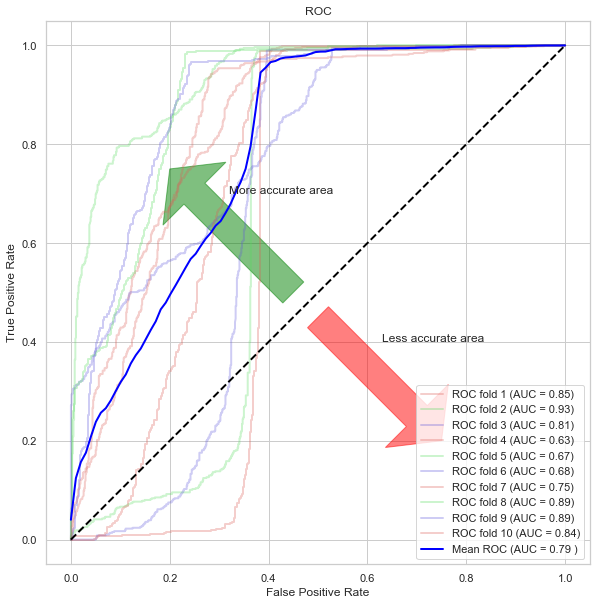

In [147]:
# plot roc
#random_state = np.random.RandomState(0)
#clf = DecisionTreeClassifier(random_state=random_state)
cv = StratifiedKFold(n_splits=10,shuffle=False)
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
import matplotlib.pylab as plt
from scipy import interp
fig1 = plt.figure(figsize=[10,10])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y):
    prediction =rf_mi_fc.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

In [148]:
'''#create a dictionary of all values we want to test
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3,12),'max_leaf_nodes': np.arange(10, 50)}
    # decision tree model
dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10)
    #fit model to data
dtree_gscv.fit(x_train, y_train)
dtree_gscv.best_params_'''

"#create a dictionary of all values we want to test\nparam_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3,12),'max_leaf_nodes': np.arange(10, 50)}\n    # decision tree model\ndtree_model=DecisionTreeClassifier()\n    #use gridsearch to test all values\ndtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10)\n    #fit model to data\ndtree_gscv.fit(x_train, y_train)\ndtree_gscv.best_params_"

In [149]:
#dtree_gscv.best_score_

In [150]:
#display the accuracy of the model in case of DT
from sklearn.tree import DecisionTreeClassifier
dt_mi=DecisionTreeClassifier(criterion="entropy",max_depth=10,max_leaf_nodes=28,random_state=123)
dt_mui=dt_mi.fit(x_train_mi_fc,y_train.values.ravel())
dt_mi=dt_mui.predict(x_test_mi_fc)
print((metrics.accuracy_score(y_test,dt_mi)))

0.7883345561261922


In [151]:
print((metrics.roc_auc_score(y_test,dt_mi)))

0.810251770410867


In [152]:
print((metrics.precision_score(y_test,dt_mi)))

0.6780575539568345


In [153]:
print((metrics.recall_score(y_test,dt_mi)))

0.9658411614005123


In [154]:
#using Kfold cross validation n_splits and take the mean accuracy DT in mi classifiers
cv=StratifiedKFold(n_splits=10,shuffle=False)
kfold=cross_val_score(dt_mui,x_train_mi_fc,y_train.values.ravel(),cv=cv)
kf_dt_mi=(kfold.mean()*100)
kf_dt_mi

78.24770642201835

In [155]:
all_merged.columns

Index(['hh_members', 'sex', 'hh_education', 'main_occupation',
       'marital_status', 'residence', 'age', 'altitude', 'Q401', 'Q406',
       'Q301', 'Q302', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform',
       'Q3098n', 'Q3099n', 'Q30910n', 'Q30911n', 'Q501', 'Q503', 'Q504',
       'Q5231', 'Q5232', 'Q5233', 'Q5234', 'Q524', 'Q5261', 'Q5263',
       'food_secured'],
      dtype='object')

In [156]:
# display accuracy in the form of table for better analysis DT
midt_acc= pd.DataFrame({
                    metrics.accuracy_score(y_test,dt_mi)*100,},
       index=['dt_mi'],columns=["Accuracy"])
midt_acc

,Accuracy
dt_mi,78.833456


In [157]:
# display accuracy in the form of table for better analysis DT
midt_cv= pd.DataFrame({kf_dt_mi},
       index=['dt_mi'],columns=["CV"])
midt_cv

,CV
dt_mi,78.247706


In [158]:
midt_p= pd.DataFrame({
                    metrics.precision_score(y_test,dt_mi)*100,},
       index=['dt_mi'],columns=["Precision"])
midt_p

,Precision
dt_mi,67.805755


In [159]:
midt_r= pd.DataFrame({
                    metrics.recall_score(y_test,dt_mi)*100,},
       index=['dt_mi'],columns=["Recall"])
midt_r

,Recall
dt_mi,96.584116


In [160]:
midt_roc= pd.DataFrame({
                    metrics.roc_auc_score(y_test,dt_mi)*100,},
       index=['dt_mi'],columns=["ROC"])
midt_roc

,ROC
dt_mi,81.025177


In [161]:
mi_dt=pd.concat([midt_acc,midt_cv,midt_roc,midt_p,midt_r],axis=1)
mi_dt

,Accuracy,CV,ROC,Precision,Recall
dt_mi,78.833456,78.247706,81.025177,67.805755,96.584116


In [162]:
#Using support vetor machine
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn import svm

In [163]:
svm_mi_fc=svm.SVC()

In [164]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [165]:
#grid = GridSearchCV(svm_mi_fc,param_grid,refit=True,verbose=2)
#grid.fit(x_train_mi_fc,y_train)

In [166]:
#best_grid=grid.best_estimator_
#best_grid

In [167]:
#C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
#  gamma=0.10000000000000001, kernel='rbf', probability=False, scale_C=True,
#  shrinking=True, tol=0.001

In [168]:
#Using support vetor machine
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn import svm
svm_mi_fc=svm.SVC()
#svm_mi_fc=svm.SVC(C=100.0,gamma=0.1,kernel='rbf')
svm_mi_fc.fit(x_train_mi_fc,y_train.values.ravel())
svm_mi=svm_mi_fc.predict(x_test_mi_fc)

In [169]:
print((metrics.accuracy_score(y_test,svm_mi))*100)

79.67718268525313


In [170]:
#using Kfold cross validation n_splits and take the mean accuracy RF in mi classifiers
cv=StratifiedKFold(n_splits=10,shuffle=False)
kfold=cross_val_score(svm_mi_fc,x_train_mi_fc,y_train.values.ravel(),cv=cv)
kf_svm_mi=((kfold.mean()*100))
kf_svm_mi

78.78899082568807

In [171]:
print((metrics.roc_auc_score(y_test,svm_mi))*100)

81.9018015766885


In [172]:
print((metrics.precision_score(y_test,svm_mi))*100)

68.46199880311191


In [173]:
print((metrics.recall_score(y_test,svm_mi))*100)

97.69427839453458


In [174]:
mi_svm_acc= pd.DataFrame({
                    metrics.accuracy_score(y_test,svm_mi)*100,},
       index=['svm_mi'],columns=["Accuracy"])
mi_svm_acc

,Accuracy
svm_mi,79.677183


In [175]:
mi_svm_cv= pd.DataFrame({kf_svm_mi},
       index=['svm_mi'],columns=["CV"])
mi_svm_cv

,CV
svm_mi,78.788991


In [176]:
mi_svm_roc= pd.DataFrame({metrics.roc_auc_score(y_test,svm_mi)*100,},
       index=['svm_mi'],columns=["ROC"])
mi_svm_roc

,ROC
svm_mi,81.901802


In [177]:
mi_svm_pr= pd.DataFrame({metrics.precision_score(y_test,svm_mi)*100,},
       index=['svm_mi'],columns=["Precision"])
mi_svm_pr

,Precision
svm_mi,68.461999


In [178]:
mi_svm_r= pd.DataFrame({metrics.recall_score(y_test,svm_mi)*100,},
       index=['svm_mi'],columns=["Recall"])
mi_svm_r

,Recall
svm_mi,97.694278


In [179]:
mi_svm=pd.concat([mi_svm_acc,mi_svm_cv,mi_svm_roc,mi_svm_pr,mi_svm_r],axis=1)
mi_svm

,Accuracy,CV,ROC,Precision,Recall
svm_mi,79.677183,78.788991,81.901802,68.461999,97.694278


In [180]:
mi_dt_rf_svm=pd.concat([mi_dt,mi_rf,mi_svm])
mi_dt_rf_svm=mi_dt_rf_svm.sort_values(ascending=False,by=["Accuracy"])
mi_dt_rf_svm=mi_dt_rf_svm.round(2)
mi_dt_rf_svm

,Accuracy,CV,ROC,Precision,Recall
svm_mi,79.68,78.79,81.90,68.46,97.69
rf_mi,79.24,78.44,81.40,68.21,96.75
dt_mi,78.83,78.25,81.03,67.81,96.58


In [181]:
print("Rf:")
print(metrics.confusion_matrix(y_test,rf_mi))
print()
print("Dt:")
print(metrics.confusion_matrix(y_test,dt_mi))
print()
print("Svm:")
print(metrics.confusion_matrix(y_test,svm_mi))

Rf:
[[1027  528]
 [  38 1133]]

Dt:
[[1018  537]
 [  40 1131]]

Svm:
[[1028  527]
 [  27 1144]]


 Feature Selection using Chi square

In [182]:
from sklearn.feature_selection import SelectKBest,SelectFromModel,chi2
sb_ch=SelectKBest(score_func=chi2,k=18)
sb_fit=sb_ch.fit(x_train,y_train)
ch_scores=pd.DataFrame(sb_fit.scores_)
ch_columns=pd.DataFrame(x_train.columns)

In [183]:
chi_score=pd.concat([ch_columns,ch_scores],axis=1)

In [184]:
chi_score.columns=["ch_attributes","scores"]
chi_score

,ch_attributes,scores
0,hh_members,29.107370
1,sex,14.254629
2,hh_education,941.908847
3,main_occupation,54.167060
4,marital_status,60.609762
5,residence,54.345892
6,age,65.099738
7,altitude,0.024416
8,Q401,35.042271
9,Q406,3.996005


In [185]:
ch_sco=chi_score.nlargest(18,'scores')

In [186]:
ch_sco

,ch_attributes,scores
16,Qsou_inform,954.585416
2,hh_education,941.908847
24,Q5231,215.368357
15,Q308m,175.881567
13,Q306,157.824839
25,Q5232,128.921671
6,age,65.099738
4,marital_status,60.609762
5,residence,54.345892
3,main_occupation,54.167060


In [187]:
chi_best=x_train.columns[sb_fit.get_support()]
chi_best

Index(['hh_members', 'hh_education', 'main_occupation', 'marital_status',
       'residence', 'age', 'Q401', 'Q301', 'Q306', 'Q307', 'Q308m',
       'Qsou_inform', 'Q3099n', 'Q30911n', 'Q501', 'Q503', 'Q5231', 'Q5232'],
      dtype='object')

In [188]:
x_train_chi=x_train[chi_best]

In [189]:
x_test_chi=x_test[chi_best]

In [190]:
x_train_chi.shape,x_test_chi.shape

((10900, 18), (2726, 18))

In [191]:
#def run_randomForest(x_train_chi,x_test_chi,y_train,y_test):
from sklearn.tree import DecisionTreeClassifier
dt_chi2=DecisionTreeClassifier(criterion="entropy",max_depth=10,max_leaf_nodes=50,random_state=42)
dt_chi2.fit(x_train_chi,y_train)
dt_chi=dt_chi2.predict(x_test_chi)
print(metrics.accuracy_score(y_test,dt_chi))

0.7582538517975055


In [192]:
cv=StratifiedKFold(n_splits=10,shuffle=False)
kfold=cross_val_score(dt_chi2,x_train_chi,y_train.values.ravel(),cv=cv)
kf_dt_chi=((kfold.mean()*100))
kf_dt_chi

75.43119266055047

In [193]:
print(metrics.roc_auc_score(y_test,dt_chi))

0.7712321620293205


In [194]:
print(metrics.precision_score(y_test,dt_chi))

0.6695364238410596


In [195]:
print(metrics.recall_score(y_test,dt_chi))

0.8633646456020495


In [196]:
# dispaly Accuracy in both RF,DT using chi square 
chidt_acc = pd.DataFrame({metrics.accuracy_score(y_test,dt_chi)*100,},   
       index=['dt_chi'],columns=["Accuracy"])
chidt_acc

,Accuracy
dt_chi,75.825385


In [197]:
# dispaly Accuracy in both RF,DT using chi square 
chidt_cv = pd.DataFrame({kf_dt_chi},
                   
       index=['dt_chi'],columns=["CV"])
chidt_cv

,CV
dt_chi,75.431193


In [198]:
# dispaly Accuracy in both RF,DT using chi square 
chidt_roc = pd.DataFrame({metrics.roc_auc_score(y_test,dt_chi)*100,},
                   
       index=['dt_chi'],columns=["ROC"])
chidt_roc

,ROC
dt_chi,77.123216


In [199]:
chidt_pr = pd.DataFrame({metrics.precision_score(y_test,dt_chi)*100,},
                   
       index=['dt_chi'],columns=["Precision"])
chidt_pr

,Precision
dt_chi,66.953642


In [200]:
chidt_r = pd.DataFrame({metrics.recall_score(y_test,dt_chi)*100,},
                   
       index=['dt_chi'],columns=["Recall"])
chidt_r

,Recall
dt_chi,86.336465


In [201]:
dt_chi=pd.concat([chidt_acc,chidt_cv,chidt_roc,chidt_pr,chidt_r],axis=1)
dt_chi

,Accuracy,CV,ROC,Precision,Recall
dt_chi,75.825385,75.431193,77.123216,66.953642,86.336465


In [202]:
#def run_randomForest(x_train_chi,x_test_chi,y_train,y_test):
from sklearn.ensemble import RandomForestClassifier
rf_chi2=RandomForestClassifier(n_estimators=300,criterion="entropy",max_depth=10,max_leaf_nodes=50,n_jobs=-1,random_state=0)
rf_chi2.fit(x_train_chi,y_train.values.ravel())
rf_chi=rf_chi2.predict(x_test_chi)
print(metrics.accuracy_score(y_test,rf_chi))

0.7754952311078503


In [203]:
cv=StratifiedKFold(n_splits=10,shuffle=False)
kfold=cross_val_score(rf_chi2,x_train_chi,y_train.values.ravel(),cv=cv)
kf_rf_chi=((kfold.mean()*100))
kf_rf_chi

76.76146788990825

In [204]:
print(metrics.roc_auc_score(y_test,rf_chi))

0.7894025223721172


In [205]:
print(metrics.precision_score(y_test,rf_chi))

0.6837606837606838


In [206]:
print(metrics.recall_score(y_test,rf_chi))

0.888129803586678


In [207]:
# dispaly Accuracy in both RF,DT using chi square 
chir_acc = pd.DataFrame({ metrics.accuracy_score(y_test,rf_chi)*100,},
                  
       index=['rf_chi'],columns=["Accuracy"])
chir_acc

,Accuracy
rf_chi,77.549523


In [208]:
chir_roc = pd.DataFrame({ metrics.roc_auc_score(y_test,rf_chi)*100,},
                  
       index=['rf_chi'],columns=["ROC"])
chir_roc

,ROC
rf_chi,78.940252


In [209]:
chir_cv = pd.DataFrame({kf_rf_chi},
                  
       index=['rf_chi'],columns=["CV"])
chir_cv

,CV
rf_chi,76.761468


In [210]:
chir_r = pd.DataFrame({ metrics.recall_score(y_test,rf_chi)*100,},
                  
       index=['rf_chi'],columns=["Recall"])
chir_r

,Recall
rf_chi,88.81298


In [211]:
chir_pr = pd.DataFrame({ metrics.precision_score(y_test,rf_chi)*100,},
                  
       index=['rf_chi'],columns=["Precision"])
chir_pr

,Precision
rf_chi,68.376068


In [212]:
chi_rf=pd.concat([chir_acc,chir_cv,chir_roc,chir_pr,chir_r],axis=1,sort=True)
chi_rf

,Accuracy,CV,ROC,Precision,Recall
rf_chi,77.549523,76.761468,78.940252,68.376068,88.81298


In [213]:
ch_rf_dt=pd.concat([dt_chi,chi_rf],axis=0).round(2)
ch_rf_dt

,Accuracy,CV,ROC,Precision,Recall
dt_chi,75.83,75.43,77.12,66.95,86.34
rf_chi,77.55,76.76,78.94,68.38,88.81


In [214]:
x_train_chi.columns

Index(['hh_members', 'hh_education', 'main_occupation', 'marital_status',
       'residence', 'age', 'Q401', 'Q301', 'Q306', 'Q307', 'Q308m',
       'Qsou_inform', 'Q3099n', 'Q30911n', 'Q501', 'Q503', 'Q5231', 'Q5232'],
      dtype='object')

In [215]:
#Using support vetor machine
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn import svm
Svm_chi=svm.SVC(C=100.0,gamma=0.1,kernel='rbf')
Svm_chi.fit(x_train_chi,y_train.values.ravel())
svm_chi=Svm_chi.predict(x_test_chi)
print(metrics.accuracy_score(y_test,svm_chi))

0.7406456346294937


In [216]:
cv=StratifiedKFold(n_splits=10,shuffle=False)
kfold=cross_val_score(Svm_chi,x_train_chi,y_train.values.ravel(),cv=cv)
kf_svm_chi=((kfold.mean()*100))
kf_svm_chi

73.01834862385321

In [217]:
print(metrics.roc_auc_score(y_test,svm_chi))

0.7453593130888212


In [218]:
print(metrics.precision_score(y_test,svm_chi))

0.6705882352941176


In [219]:
print(metrics.recall_score(y_test,svm_chi))

0.7788215200683177


In [220]:
chi_svm_acc = pd.DataFrame({metrics.accuracy_score(y_test,svm_chi)*100,},
       index=['svm_chi'],columns=["Accuracy"])
chi_svm_acc 

,Accuracy
svm_chi,74.064563


In [221]:
chi_svm_cv = pd.DataFrame({kf_svm_chi},
       index=['svm_chi'],columns=["CV"])
chi_svm_cv

,CV
svm_chi,73.018349


In [222]:
chi_svm_r = pd.DataFrame({metrics.recall_score(y_test,svm_chi)*100,},
       index=['svm_chi'],columns=["Recall"])
chi_svm_r 

,Recall
svm_chi,77.882152


In [223]:
chi_svm_roc = pd.DataFrame({metrics.roc_auc_score(y_test,svm_chi)*100,},
       index=['svm_chi'],columns=["ROC"])
chi_svm_roc

,ROC
svm_chi,74.535931


In [224]:
chi_svm_pr = pd.DataFrame({metrics.precision_score(y_test,svm_chi)*100,},
       index=['svm_chi'],columns=["Precision"])
chi_svm_pr

,Precision
svm_chi,67.058824


In [225]:
svm_chi=pd.concat([chi_svm_acc,chi_svm_cv,chi_svm_roc,chi_svm_pr,chi_svm_r],axis=1)
svm_chi

,Accuracy,CV,ROC,Precision,Recall
svm_chi,74.064563,73.018349,74.535931,67.058824,77.882152


In [226]:
chi=pd.concat([dt_chi,svm_chi,chi_rf],axis=0)
chi=chi.sort_values(ascending=False,by=["Accuracy"])
chi

,Accuracy,CV,ROC,Precision,Recall
rf_chi,77.549523,76.761468,78.940252,68.376068,88.812980
dt_chi,75.825385,75.431193,77.123216,66.953642,86.336465
svm_chi,74.064563,73.018349,74.535931,67.058824,77.882152


In [227]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
feature_names=x_train_chi.columns

dot_data = StringIO()
rf_mi_fc=RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=5,max_leaf_nodes=100,n_jobs=-1)
rf_mi_fc.fit(x_train_mi_fc,y_train.values.ravel())


def printTree(rf_mi_fc, index):
    dot_data = tree.export_graphviz(rf_mi_fc, out_file=None,
                                    feature_names=feature_names,
                                    class_names=['0','1'])
    # Build the graph
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph
    #graph.write_png('xx.png')

    # Write the image
    Image(graph.create_png())
    graph.write_png("RF_mi_15_5_" + str(index) + ".png")

In [228]:
from sklearn import tree
for index in range(len(rf_mi_fc.estimators_)):
    printTree(rf_mi_fc.estimators_[index], index)

In [229]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pandas as pd
import pydotplus

from IPython.display import Image
#xx=['hh_education', 'main_occupation', 'age','Q301','Q306', 'Q308m', 'Qsou_inform','Q501', 'Q5231','Q5232']
#x_train_xx=x_train_chi[xx]
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features=10,max_leaf_nodes=50)
dtree.fit(x_train_mi_fc,y_train)

dot_data = StringIO()
export_graphviz(
    dtree, 
    out_file = dot_data,
    filled = True, 
    rounded = True,
    feature_names=x_train_mi_fc.columns,
    class_names=['0','1'],
    special_characters = True
)
graph_1 = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph_1.create_png())
graph_1.write_png('DT_mi_15_5.png')

True

In [230]:
# call best features in mutual_info_classifiers
mi_best

Index(['sex', 'hh_education', 'main_occupation', 'marital_status', 'residence',
       'Q401', 'Q406', 'Q302', 'Q306', 'Q307', 'Q308m', 'Qsou_inform', 'Q501',
       'Q503', 'Q5231', 'Q5232', 'Q5233', 'Q5234'],
      dtype='object')

In [231]:
## call best features in chi-square
chi_best

Index(['hh_members', 'hh_education', 'main_occupation', 'marital_status',
       'residence', 'age', 'Q401', 'Q301', 'Q306', 'Q307', 'Q308m',
       'Qsou_inform', 'Q3099n', 'Q30911n', 'Q501', 'Q503', 'Q5231', 'Q5232'],
      dtype='object')

In [232]:
##call accuracy using chi2
chi

,Accuracy,CV,ROC,Precision,Recall
rf_chi,77.549523,76.761468,78.940252,68.376068,88.812980
dt_chi,75.825385,75.431193,77.123216,66.953642,86.336465
svm_chi,74.064563,73.018349,74.535931,67.058824,77.882152


In [233]:
##call all accuracy using mutuai_info_classifiers together
mi_chi=pd.concat([mi_dt_rf_svm,chi],sort=True)
mi_chi=mi_chi.sort_values(ascending=False,by=["Accuracy"]).round(2)
mi_chi

,Accuracy,CV,Precision,ROC,Recall
svm_mi,79.68,78.79,68.46,81.90,97.69
rf_mi,79.24,78.44,68.21,81.40,96.75
dt_mi,78.83,78.25,67.81,81.03,96.58
rf_chi,77.55,76.76,68.38,78.94,88.81
dt_chi,75.83,75.43,66.95,77.12,86.34
svm_chi,74.06,73.02,67.06,74.54,77.88


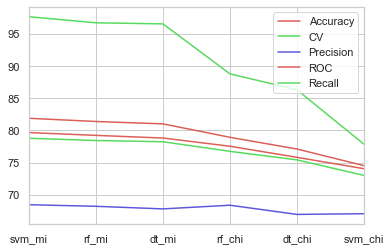

In [234]:
#visualize accuracy and kfoldcv for mi,chi2,fc in [RF,DT]
mi_chi.plot()

In [235]:
##call all accuracy using mutuai_info_classifiers together
mi_chi=pd.concat([mi_dt_rf_svm,chi],sort=True).round(2)
mi_chi=mi_chi.sort_values(ascending=False,by=["Accuracy"])
mi_chi

,Accuracy,CV,Precision,ROC,Recall
svm_mi,79.68,78.79,68.46,81.90,97.69
rf_mi,79.24,78.44,68.21,81.40,96.75
dt_mi,78.83,78.25,67.81,81.03,96.58
rf_chi,77.55,76.76,68.38,78.94,88.81
dt_chi,75.83,75.43,66.95,77.12,86.34
svm_chi,74.06,73.02,67.06,74.54,77.88


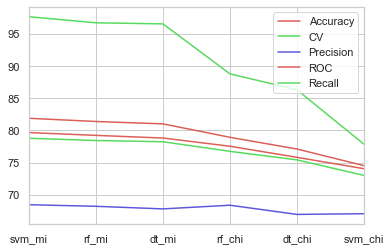

In [236]:
mi_chi.plot()

In [237]:
from sklearn.ensemble import RandomForestClassifier

# create the random forest with your hyperparameters.
model = RandomForestClassifier(n_estimators=100)

# fit the model to start training.
model.fit(x_train, y_train.values.ravel())

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.
final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
final_df.set_index('Importances')

# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')


In [239]:
importance=final_df.nlargest(18,'Importances')
importance

,Features,Importances
24,Q5231,0.175495
25,Q5232,0.118336
2,hh_education,0.051980
21,Q501,0.048168
16,Qsou_inform,0.043579
23,Q504,0.041249
6,age,0.040472
18,Q3099n,0.032105
0,hh_members,0.029043
4,marital_status,0.027364


In [240]:
all_merged.columns

Index(['hh_members', 'sex', 'hh_education', 'main_occupation',
       'marital_status', 'residence', 'age', 'altitude', 'Q401', 'Q406',
       'Q301', 'Q302', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform',
       'Q3098n', 'Q3099n', 'Q30910n', 'Q30911n', 'Q501', 'Q503', 'Q504',
       'Q5231', 'Q5232', 'Q5233', 'Q5234', 'Q524', 'Q5261', 'Q5263',
       'food_secured'],
      dtype='object')

In [241]:
#mi_best=mutual info classifaction
#chi_best= best feature using chi square 
df = pd.DataFrame({'mi_best': mi_best,
           'chi_best':chi_best,
            },
       columns=['mi_best', 'chi_best'])
df

,mi_best,chi_best
0,sex,hh_members
1,hh_education,hh_education
2,main_occupation,main_occupation
3,marital_status,marital_status
4,residence,residence
5,Q401,age
6,Q406,Q401
7,Q302,Q301
8,Q306,Q306
9,Q307,Q307


In [242]:
score=pd.concat([mi_columns,mi_scores,ch_columns,ch_scores],axis=1)      

In [243]:
score.columns=['mut_info_att','mut_info_attr_score','chi_attr','chi_attr_score']
score

,mut_info_att,mut_info_attr_score,chi_attr,chi_attr_score
0,hh_members,0.002159,hh_members,29.107370
1,sex,0.011637,sex,14.254629
2,hh_education,0.027239,hh_education,941.908847
3,main_occupation,0.016688,main_occupation,54.167060
4,marital_status,0.005202,marital_status,60.609762
5,residence,0.012541,residence,54.345892
6,age,0.000075,age,65.099738
7,altitude,0.004483,altitude,0.024416
8,Q401,0.009061,Q401,35.042271
9,Q406,0.012013,Q406,3.996005


In [244]:
print(score.nlargest(16,['mut_info_attr_score']))

       mut_info_att  mut_info_attr_score         chi_attr  chi_attr_score
24            Q5231             0.136947            Q5231      215.368357
25            Q5232             0.104270            Q5232      128.921671
16      Qsou_inform             0.035698      Qsou_inform      954.585416
21             Q501             0.028168             Q501       29.137572
2      hh_education             0.027239     hh_education      941.908847
14             Q307             0.024964             Q307       45.178757
26            Q5233             0.017513            Q5233        9.456338
13             Q306             0.017000             Q306      157.824839
3   main_occupation             0.016688  main_occupation       54.167060
5         residence             0.012541        residence       54.345892
9              Q406             0.012013             Q406        3.996005
1               sex             0.011637              sex       14.254629
27            Q5234             0.0114

In [245]:
best_attributes=pd.concat([f_mi_score,ch_sco],axis=1) 
best_attributes.fillna("")

,mutual_info,scores,ch_attributes,scores
0,,,hh_members,29.1074
1,sex,0.0116372,,
2,hh_education,0.0272393,hh_education,941.909
3,main_occupation,0.0166875,main_occupation,54.1671
4,marital_status,0.00520172,marital_status,60.6098
5,residence,0.0125414,residence,54.3459
6,,,age,65.0997
8,Q401,0.00906065,Q401,35.0423
9,Q406,0.0120132,,
10,,,Q301,16.2145


In [246]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,accuracy_score

# list of the resulting scores.
roc_values = []

# loop over all features and calculate the score.
for feature in x_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(x_train[feature].to_frame(), y_train)
    y_scored = clf.predict_proba(x_test[feature].to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

# create a Pandas Series for visualisation.
roc_values = pd.Series(roc_values)
roc_values.index = x_train.columns

# show the results.
print(roc_values.sort_values(ascending=False))

Q5231              0.694439
Qsou_inform        0.648577
Q5232              0.644484
hh_education       0.630719
Q306               0.616604
Q307               0.614859
Q501               0.599147
Q503               0.584828
main_occupation    0.580956
Q401               0.580076
Q308m              0.575348
residence          0.561560
age                0.557353
marital_status     0.553238
Q301               0.549872
Q5263              0.549295
Q30911n            0.546450
altitude           0.544863
Q5234              0.539776
Q5233              0.539339
Q406               0.531887
hh_members         0.530462
Q3098n             0.528384
Q304               0.523684
Q504               0.520686
Q5261              0.520325
sex                0.516056
Q3099n             0.512768
Q302               0.510659
Q30910n            0.501873
Q524               0.494929
dtype: float64


In [247]:
all_merged.shape

(13626, 32)

In [248]:
all_merged.astype(int)

,hh_members,sex,hh_education,main_occupation,marital_status,residence,age,altitude,Q401,Q406,...,Q503,Q504,Q5231,Q5232,Q5233,Q5234,Q524,Q5261,Q5263,food_secured
hhid,,,,,,,,,,,,,,,,,,,,,
DT0100002,1,1,0,2,1,0,1,2,1,2,...,2,4,1,2,2,2,1,1,2,0
DT0100005,1,1,1,3,1,0,1,2,1,2,...,2,2,1,2,2,2,1,2,2,0
DT0100006,0,1,3,4,1,0,1,2,1,2,...,0,2,2,2,2,2,1,2,2,1
DT0100007,0,1,3,4,1,0,1,2,1,2,...,0,2,2,2,2,2,1,1,2,0
DT0100011,0,1,3,2,2,0,0,2,1,2,...,2,2,1,2,2,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DT1301282,1,0,0,2,4,1,1,2,2,2,...,2,1,2,2,2,2,1,1,2,1
DT1301283,1,1,1,2,1,1,1,2,2,2,...,1,2,2,2,2,2,1,1,2,0
DT1301284,1,1,3,2,1,1,1,2,2,2,...,1,1,1,2,2,2,1,1,2,0


In [250]:
importance=final_df.nlargest(18,'Importances')
importance

,Features,Importances
24,Q5231,0.175495
25,Q5232,0.118336
2,hh_education,0.051980
21,Q501,0.048168
16,Qsou_inform,0.043579
23,Q504,0.041249
6,age,0.040472
18,Q3099n,0.032105
0,hh_members,0.029043
4,marital_status,0.027364


In [251]:
x_train.shape,x_test.shape

((10900, 31), (2726, 31))

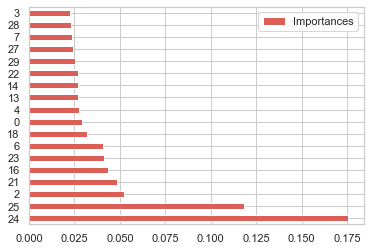

In [252]:
importance.plot.barh()

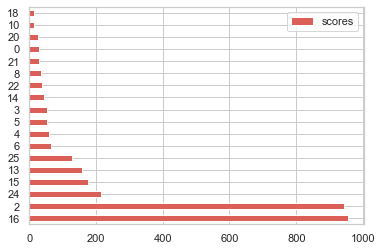

In [253]:
ch_sco.plot.barh()

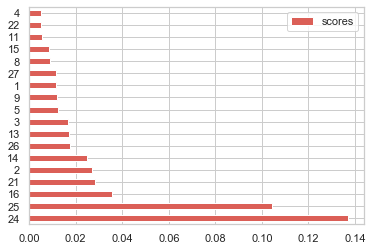

In [254]:
f_mi_score.plot.barh()

In [255]:
from sklearn.feature_selection import SelectFromModel
clf =SelectFromModel(RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=None))
# Train the classifier
clf.fit(x_train, y_train.values.ravel())
clf.get_support()
selected_feat=x_train.columns[(clf.get_support())]
print("number of features:",len(selected_feat))
print()
print("selected features :",selected_feat)

# Print the name and gini importance of each feature
##for feature in zip(x_train.columns, clf.feature_importances_):
  #  print(feature)

number of features: 7

selected features : Index(['hh_education', 'age', 'Qsou_inform', 'Q501', 'Q504', 'Q5231', 'Q5232'], dtype='object')


In [256]:
selected_feat

Index(['hh_education', 'age', 'Qsou_inform', 'Q501', 'Q504', 'Q5231', 'Q5232'], dtype='object')

In [257]:
x_train_rf=x_train[selected_feat]
x_test_rf=x_test[selected_feat]

In [258]:
x_train_rf.shape,x_test_rf.shape

((10900, 7), (2726, 7))

In [259]:
#def run_randomForest(x_train_fc,x_test_fc,y_train,y_test):
from sklearn.ensemble import RandomForestClassifier
rf_=RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=10,max_leaf_nodes=100)
rf_.fit(x_train_rf,y_train.values.ravel())
rf_=rf_.predict(x_test_rf)
print(metrics.accuracy_score(y_test,rf_))

0.7677916360968452


In [260]:
#Using support vetor machine
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn import svm
Svm=svm.SVC()
Svm.fit(x_train_rf,y_train.values.ravel())
pred_Svm=Svm.predict(x_test_rf)

In [261]:
print(" Therefore accuracy for SVM:",(accuracy_score(y_test,pred_Svm))*100)

 Therefore accuracy for SVM: 76.74247982391783


In [262]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train_mi_fc,y_train.values.ravel())
y_pred=knn.predict(x_test_mi_fc)
print (accuracy_score(y_test,y_pred))

0.7542186353631695


In [263]:
mi_chi

,Accuracy,CV,Precision,ROC,Recall
svm_mi,79.68,78.79,68.46,81.90,97.69
rf_mi,79.24,78.44,68.21,81.40,96.75
dt_mi,78.83,78.25,67.81,81.03,96.58
rf_chi,77.55,76.76,68.38,78.94,88.81
dt_chi,75.83,75.43,66.95,77.12,86.34
svm_chi,74.06,73.02,67.06,74.54,77.88


In [264]:
df

,mi_best,chi_best
0,sex,hh_members
1,hh_education,hh_education
2,main_occupation,main_occupation
3,marital_status,marital_status
4,residence,residence
5,Q401,age
6,Q406,Q401
7,Q302,Q301
8,Q306,Q306
9,Q307,Q307


#### Wrapper Feature selction methods

Library to install

In [265]:
# command for pip  such as  pip "install mlxtend"

Forward Feature Selection
Also known as step forward feature selection (or sequential forward feature selection — SFS), this is an iterative method in which we start by evaluating all features individually, and then select the one that results in the best performance.

In [266]:
#pip install mlxtend

In [267]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

k_features: The maximum feature to be reached when starting from 0.
forward: Use step forward or step backward feature selection.
floating: step floating forward selection.
scoring: evaluate model performance
cv: The number of folds of K-fold cross-validation

In [268]:
# create the SequentialFeatureSelector object, and configure the parameters.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sfs = SFS(RandomForestClassifier(max_depth=10,max_leaf_nodes=50,criterion='entropy',n_estimators=100), 
           k_features=18, 
           forward=True, 
           floating=False,
           scoring='accuracy',
           cv=10)

In [269]:
# fit the object to the training data.
sfs = sfs.fit(x_train,y_train.values.ravel())

In [270]:
# print the selected features.
sfs_featueres = x_train.columns[list(sfs.k_feature_idx_)]
print(sfs_featueres)

Index(['hh_members', 'sex', 'main_occupation', 'altitude', 'Q401', 'Q406',
       'Q301', 'Q304', 'Q307', 'Q308m', 'Qsou_inform', 'Q503', 'Q504', 'Q5231',
       'Q5232', 'Q5233', 'Q5234', 'Q524'],
      dtype='object')


In [271]:
# print the final prediction score.
print(sfs.k_score_)
# transform to the newly selected features.
x_train_sfs = sfs.transform(x_train)
x_test_sfs = sfs.transform(x_test)

0.793211009174312


In [272]:
x_train_sfs.shape,x_test_sfs.shape

((10900, 18), (2726, 18))

In [273]:
x_train_sfs

array([[1, 1, 2, ..., 2, 2, 1],
       [1, 0, 2, ..., 2, 2, 2],
       [1, 1, 2, ..., 2, 2, 1],
       ...,
       [1, 1, 2, ..., 2, 2, 1],
       [0, 1, 2, ..., 1, 2, 1],
       [1, 1, 2, ..., 2, 2, 1]], dtype=int64)

In [274]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(24,)","[0.6559633027522935, 0.6513761467889908, 0.653...",0.646422,"(Q5231,)",0.00519109,0.00698936,0.00232979
2,"(24, 25)","[0.7495412844036697, 0.7623853211009174, 0.751...",0.748899,"(Q5231, Q5232)",0.00648608,0.00873296,0.00291099
3,"(24, 25, 27)","[0.7706422018348624, 0.7798165137614679, 0.769...",0.768807,"(Q5231, Q5232, Q5234)",0.00666229,0.00897021,0.00299007
4,"(24, 25, 26, 27)","[0.781651376146789, 0.8009174311926606, 0.7844...",0.785505,"(Q5231, Q5232, Q5233, Q5234)",0.0063541,0.00855526,0.00285175
5,"(1, 24, 25, 26, 27)","[0.781651376146789, 0.8009174311926606, 0.7844...",0.785505,"(sex, Q5231, Q5232, Q5233, Q5234)",0.0063541,0.00855526,0.00285175
6,"(1, 3, 24, 25, 26, 27)","[0.781651376146789, 0.8009174311926606, 0.7844...",0.785505,"(sex, main_occupation, Q5231, Q5232, Q5233, Q5...",0.0063541,0.00855526,0.00285175
7,"(1, 3, 16, 24, 25, 26, 27)","[0.781651376146789, 0.8, 0.7862385321100918, 0...",0.786239,"(sex, main_occupation, Qsou_inform, Q5231, Q52...",0.00496993,0.00669159,0.00223053
8,"(1, 3, 15, 16, 24, 25, 26, 27)","[0.7862385321100918, 0.8045871559633028, 0.788...",0.78789,"(sex, main_occupation, Q308m, Qsou_inform, Q52...",0.00643398,0.0086628,0.0028876
9,"(0, 1, 3, 15, 16, 24, 25, 26, 27)","[0.7880733944954128, 0.8, 0.7908256880733945, ...",0.788899,"(hh_members, sex, main_occupation, Q308m, Qsou...",0.0051394,0.00691977,0.00230659
10,"(0, 1, 3, 12, 15, 16, 24, 25, 26, 27)","[0.7880733944954128, 0.8, 0.789908256880734, 0...",0.789358,"(hh_members, sex, main_occupation, Q304, Q308m...",0.00529733,0.0071324,0.00237747


In [275]:
sfs_featueres

Index(['hh_members', 'sex', 'main_occupation', 'altitude', 'Q401', 'Q406',
       'Q301', 'Q304', 'Q307', 'Q308m', 'Qsou_inform', 'Q503', 'Q504', 'Q5231',
       'Q5232', 'Q5233', 'Q5234', 'Q524'],
      dtype='object')

In [276]:
x_train_sfss=x_train[sfs_featueres]
x_test_sfss=x_test[sfs_featueres]

In [277]:
dt_sfs=DecisionTreeClassifier(criterion="entropy",max_depth=10,max_leaf_nodes=50)
dt_sfs.fit(x_train_sfss,y_train.values.ravel())
dt_sfs=dt_sfs.predict(x_test_sfss)
print(metrics.accuracy_score(y_test,dt_sfs))

0.7901687454145268


In [278]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn import svm
svm_sfs=svm.SVC()
svm_sfs.fit(x_train_sfss,y_train.values.ravel())
svm_sfs=svm_sfs.predict(x_test_sfss)
print(metrics.accuracy_score(y_test,svm_sfs))

0.7945707997065297


In [279]:
# just set forward=False for backward feature selection.
# create theSequentialFeatureSelector object, and configure the parameters.
from mlxtend.feature_selection import SequentialFeatureSelector

# import the algorithm you want to evaluate on your features.
from sklearn.ensemble import RandomForestClassifier

sbs = SequentialFeatureSelector(RandomForestClassifier(max_depth=10,max_leaf_nodes=100,criterion='entropy',n_estimators=100,random_state=10), 
           k_features=18, 
           forward=False, 
           floating=False,
           scoring='accuracy',
           cv=10)

In [280]:
# fit the object to our training data.
sbs = sbs.fit(x_train, y_train.values.ravel())

In [281]:
# print the selected features. 
sbs_features = x_train.columns[list(sbs.k_feature_idx_)]
sbs_features

Index(['hh_members', 'sex', 'hh_education', 'residence', 'age', 'altitude',
       'Q401', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform', 'Q504', 'Q5231',
       'Q5232', 'Q5233', 'Q5234', 'Q524'],
      dtype='object')

In [282]:
# print the final prediction score.
print(sbs.k_score_)

0.7945871559633028


In [283]:
# transform to the newly selected features.
x_train_sbs = sbs.transform(x_train)
x_test_sbs = sbs.transform(x_test)

In [284]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
31,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7788990825688074, 0.8027522935779816, 0.798...",0.793394,"(hh_members, sex, hh_education, main_occupatio...",0.00741305,0.00998104,0.00332701
30,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.7853211009174312, 0.8045871559633028, 0.800...",0.795321,"(hh_members, sex, hh_education, marital_status...",0.00687122,0.00925151,0.00308384
29,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[0.7844036697247706, 0.808256880733945, 0.7954...",0.794954,"(hh_members, sex, hh_education, marital_status...",0.00704339,0.00948333,0.00316111
28,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[0.7871559633027523, 0.8036697247706422, 0.795...",0.795046,"(hh_members, sex, hh_education, marital_status...",0.00607315,0.00817698,0.00272566
27,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[0.7871559633027523, 0.8, 0.7972477064220184, ...",0.794862,"(hh_members, sex, hh_education, marital_status...",0.00644407,0.0086764,0.00289213
26,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[0.7871559633027523, 0.8119266055045872, 0.799...",0.795688,"(hh_members, sex, hh_education, marital_status...",0.00726278,0.00977871,0.00325957
25,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15...","[0.7880733944954128, 0.8110091743119267, 0.795...",0.794404,"(hh_members, sex, hh_education, marital_status...",0.00660946,0.00889908,0.00296636
24,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...","[0.7908256880733945, 0.808256880733945, 0.7963...",0.796422,"(hh_members, sex, hh_education, residence, age...",0.00602903,0.00811758,0.00270586
23,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 1...","[0.7889908256880734, 0.8091743119266055, 0.796...",0.795596,"(hh_members, sex, hh_education, residence, age...",0.00639053,0.00860431,0.0028681
22,"(0, 1, 2, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, ...","[0.7935779816513762, 0.808256880733945, 0.7954...",0.795688,"(hh_members, sex, hh_education, residence, age...",0.00560273,0.00754361,0.00251454


In [285]:
x_train_sbs

array([[1, 1, 1, ..., 2, 2, 1],
       [1, 0, 0, ..., 2, 2, 2],
       [1, 1, 0, ..., 2, 2, 1],
       ...,
       [1, 1, 0, ..., 2, 2, 1],
       [0, 1, 0, ..., 1, 2, 1],
       [1, 1, 1, ..., 2, 2, 1]], dtype=int64)

In [286]:
SFS = pd.DataFrame({'SFFS': sfs_featueres,
                  
                 'SBFS':sbs_features,
                  },
       columns=['SFFS','SBFS'])
SFS 

,SFFS,SBFS
0,hh_members,hh_members
1,sex,sex
2,main_occupation,hh_education
3,altitude,residence
4,Q401,age
5,Q406,altitude
6,Q301,Q401
7,Q304,Q304
8,Q307,Q306
9,Q308m,Q307


In [287]:
SFS_scores = pd.DataFrame({'SFFS':sfs.k_score_,
                   'SBFS':sbs.k_score_},
       columns=['SFFS','SBFS'],index=["Acc:SFS"])
SFS_scores

,SFFS,SBFS
Acc:SFS,0.793211,0.794587


In [288]:
wrapper_SFS=pd.concat([SFS,SFS_scores])
wrapper_SFS

,SFFS,SBFS
0,hh_members,hh_members
1,sex,sex
2,main_occupation,hh_education
3,altitude,residence
4,Q401,age
5,Q406,altitude
6,Q301,Q401
7,Q304,Q304
8,Q307,Q306
9,Q308m,Q307


In [289]:
SFS = pd.DataFrame({'SFFS': sfs_featueres,
                  
                 'SBFS':sbs_features,
                  },
       columns=['SFFS','SBFS'])
 

In [290]:
SFS_scores = pd.DataFrame({'SFFS':sfs.k_score_,
                   'SBFS':sbs.k_score_},
       columns=['SFFS','SBFS'],index=["Acc:SFS"])
SFS_scores

,SFFS,SBFS
Acc:SFS,0.793211,0.794587


In [291]:
wrapper_SFS=pd.concat([SFS,SFS_scores])
wrapper_SFS

,SFFS,SBFS
0,hh_members,hh_members
1,sex,sex
2,main_occupation,hh_education
3,altitude,residence
4,Q401,age
5,Q406,altitude
6,Q301,Q401
7,Q304,Q304
8,Q307,Q306
9,Q308m,Q307


In [292]:
sbs_features

Index(['hh_members', 'sex', 'hh_education', 'residence', 'age', 'altitude',
       'Q401', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform', 'Q504', 'Q5231',
       'Q5232', 'Q5233', 'Q5234', 'Q524'],
      dtype='object')

In [293]:
x_train_sbs=x_train[sbs_features]
x_test_sbs=x_test[sbs_features]

In [294]:
rf_sbs=RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=10,max_leaf_nodes=50)
rf_sbs.fit(x_train_sbs,y_train.values.ravel())
rf_sbs=rf_sbs.predict(x_test_sbs)
print(metrics.accuracy_score(y_test,rf_sbs))

0.8033749082905356


In [295]:
dt_sbs=DecisionTreeClassifier(criterion="entropy",max_depth=10,max_leaf_nodes=50)
dt_sbs.fit(x_train_sbs,y_train.values.ravel())
dt_sbs=dt_sbs.predict(x_test_sbs)
print(metrics.accuracy_score(y_test,dt_sbs))

0.7920029347028613


In [296]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn import svm
svm_sbs=svm.SVC()
svm_sbs.fit(x_train_sbs,y_train.values.ravel())
svm_sbs=svm_sbs.predict(x_test_sbs)
print(metrics.accuracy_score(y_test,svm_sbs))

0.7964049889948642


In [297]:
df

,mi_best,chi_best
0,sex,hh_members
1,hh_education,hh_education
2,main_occupation,main_occupation
3,marital_status,marital_status
4,residence,residence
5,Q401,age
6,Q406,Q401
7,Q302,Q301
8,Q306,Q306
9,Q307,Q307


In [298]:
selected=pd.concat([df,wrapper_SFS],axis=1)

In [299]:
selected

,mi_best,chi_best,SFFS,SBFS
0,sex,hh_members,hh_members,hh_members
1,hh_education,hh_education,sex,sex
2,main_occupation,main_occupation,main_occupation,hh_education
3,marital_status,marital_status,altitude,residence
4,residence,residence,Q401,age
5,Q401,age,Q406,altitude
6,Q406,Q401,Q301,Q401
7,Q302,Q301,Q304,Q304
8,Q306,Q306,Q307,Q306
9,Q307,Q307,Q308m,Q307


In [300]:
all_merged.columns

Index(['hh_members', 'sex', 'hh_education', 'main_occupation',
       'marital_status', 'residence', 'age', 'altitude', 'Q401', 'Q406',
       'Q301', 'Q302', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform',
       'Q3098n', 'Q3099n', 'Q30910n', 'Q30911n', 'Q501', 'Q503', 'Q504',
       'Q5231', 'Q5232', 'Q5233', 'Q5234', 'Q524', 'Q5261', 'Q5263',
       'food_secured'],
      dtype='object')

In [316]:
sbs_features

Index(['hh_members', 'sex', 'hh_education', 'residence', 'age', 'altitude',
       'Q401', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform', 'Q504', 'Q5231',
       'Q5232', 'Q5233', 'Q5234', 'Q524'],
      dtype='object')

In [317]:
x_train_sb=x_train[sbs_features]
x_test_sb=x_test[sbs_features]

In [318]:
#def run_randomForest(x_train_chi,x_test_chi,y_train,y_test):
from sklearn.tree import DecisionTreeClassifier
dt_sb=DecisionTreeClassifier(criterion="entropy",max_depth=10,max_leaf_nodes=50,random_state=42)
dt_sb.fit(x_train_sb,y_train)
dt_sb=dt_sb.predict(x_test_sb)
print(metrics.accuracy_score(y_test,dt_sb))

0.7920029347028613


In [319]:
#def run_randomForest(x_train_chi,x_test_chi,y_train,y_test):
from sklearn.ensemble import RandomForestClassifier
rf_sb=RandomForestClassifier(n_estimators=100,criterion="entropy",max_depth=10,max_leaf_nodes=50,random_state=42)
rf_sb.fit(x_train_sb,y_train)
rf_sb=rf_sb.predict(x_test_sb)
print(metrics.accuracy_score(y_test,rf_sb))

0.8008070432868672


We’re also using RFECV to do recursive feature elimination with cross-validation.

min_feature_to_select:sets the minimum number of features to select.
step: How many features we remove at each step.
cv: An iterable that describes the cross-validation splitting strategy.
scoring: The evaluation metric we use.

In [320]:
from sklearn.feature_selection import RFECV
# use any other model you want here.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

model = RandomForestClassifier(n_estimators=100,max_depth=10,n_jobs=-1,max_leaf_nodes=28,criterion="entropy")
# build the RFE with CV option.
skf=StratifiedKFold(n_splits=10,shuffle=True)
rfe = RFECV(model, step = 1 , cv=skf, scoring='accuracy')

In [321]:
# fit the RFE to our data.
selection  = rfe.fit(x_train, y_train.values.ravel())
# print the selected features.
print(x_train.columns[selection.support_]) 

Index(['hh_members', 'sex', 'hh_education', 'main_occupation',
       'marital_status', 'age', 'altitude', 'Q401', 'Q406', 'Q302', 'Q306',
       'Q307', 'Q308m', 'Qsou_inform', 'Q3098n', 'Q3099n', 'Q30910n', 'Q501',
       'Q503', 'Q504', 'Q5231', 'Q5232', 'Q5233', 'Q5234', 'Q524', 'Q5261',
       'Q5263'],
      dtype='object')


In [322]:
rf_featues=x_train.columns[selection.get_support()]
rf_featues

Index(['hh_members', 'sex', 'hh_education', 'main_occupation',
       'marital_status', 'age', 'altitude', 'Q401', 'Q406', 'Q302', 'Q306',
       'Q307', 'Q308m', 'Qsou_inform', 'Q3098n', 'Q3099n', 'Q30910n', 'Q501',
       'Q503', 'Q504', 'Q5231', 'Q5232', 'Q5233', 'Q5234', 'Q524', 'Q5261',
       'Q5263'],
      dtype='object')

In [323]:
rf_featues.shape

(27,)

In [324]:
y_pred_rfecv=selection.predict(x_test)
rfecv=accuracy_score(y_test,y_pred_rfecv)
rfecv

0.7964049889948642

In [325]:
roc=roc_auc_score(y_test,y_pred_rfecv)
roc

0.8157440942827879

In [326]:
SFS_sc = pd.DataFrame({(sfs.k_score_),
                   (sbs.k_score_),},
                  index=['SFs','SBs'],columns=["score"])
SFS_sc

,score
SFs,0.793211
SBs,0.794587


In [327]:
Rfecv = pd.DataFrame({rfecv,
                 roc,},
       index=['rfecv','roc'],columns=["score"])
Rfecv  

,score
rfecv,0.796405
roc,0.815744


In [328]:
ax=pd.concat([SFS_sc,Rfecv])
ax

,score
SFs,0.793211
SBs,0.794587
rfecv,0.796405
roc,0.815744


In [329]:
all_merged.shape

(13626, 32)

In [330]:
df

,mi_best,chi_best
0,sex,hh_members
1,hh_education,hh_education
2,main_occupation,main_occupation
3,marital_status,marital_status
4,residence,residence
5,Q401,age
6,Q406,Q401
7,Q302,Q301
8,Q306,Q306
9,Q307,Q307


In [331]:
all_merged.shape

(13626, 32)

In [336]:
sbs_features

Index(['hh_members', 'sex', 'hh_education', 'residence', 'age', 'altitude',
       'Q401', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform', 'Q504', 'Q5231',
       'Q5232', 'Q5233', 'Q5234', 'Q524'],
      dtype='object')

In [337]:
all_merged.columns

Index(['hh_members', 'sex', 'hh_education', 'main_occupation',
       'marital_status', 'residence', 'age', 'altitude', 'Q401', 'Q406',
       'Q301', 'Q302', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform',
       'Q3098n', 'Q3099n', 'Q30910n', 'Q30911n', 'Q501', 'Q503', 'Q504',
       'Q5231', 'Q5232', 'Q5233', 'Q5234', 'Q524', 'Q5261', 'Q5263',
       'food_secured'],
      dtype='object')

In [338]:
all_merged.shape

(13626, 32)

In [344]:
df=['hh_members', 'sex', 'hh_education', 'residence', 'age', 'altitude',
       'Q401', 'Q304', 'Q306', 'Q307', 'Q308m', 'Qsou_inform', 'Q504', 'Q5231',
       'Q5232', 'Q5233', 'Q5234', 'Q524','main_occupation','marital_status','Q3098n',
    'Q3099n', 'Q30910n', 'Q30911n','food_secured']

In [345]:
final=all_merged[df]
final

,hh_members,sex,hh_education,residence,age,altitude,Q401,Q304,Q306,Q307,...,Q5233,Q5234,Q524,main_occupation,marital_status,Q3098n,Q3099n,Q30910n,Q30911n,food_secured
hhid,,,,,,,,,,,,,,,,,,,,,
DT0100002,1,1,0,0,1,2,1,1,3,2,...,2,2,1,2,1,1,1,1,1,0
DT0100005,1,1,1,0,1,2,1,1,1,3,...,2,2,1,3,1,0,0,0,0,0
DT0100006,0,1,3,0,1,2,1,1,1,3,...,2,2,1,4,1,0,0,0,0,1
DT0100007,0,1,3,0,1,2,1,1,1,3,...,2,2,1,4,1,0,0,1,0,0
DT0100011,0,1,3,0,0,2,1,1,1,3,...,2,2,1,2,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DT1301282,1,0,0,1,1,2,2,1,3,2,...,2,2,1,2,4,1,0,1,1,1
DT1301283,1,1,1,1,1,2,2,1,4,2,...,2,2,1,2,1,1,0,1,1,0
DT1301284,1,1,3,1,1,2,2,1,3,2,...,2,2,1,2,1,1,1,1,1,0


In [346]:
all_merged

,hh_members,sex,hh_education,main_occupation,marital_status,residence,age,altitude,Q401,Q406,...,Q503,Q504,Q5231,Q5232,Q5233,Q5234,Q524,Q5261,Q5263,food_secured
hhid,,,,,,,,,,,,,,,,,,,,,
DT0100002,1,1,0,2,1,0,1,2,1,2,...,2,4,1,2,2,2,1,1,2,0
DT0100005,1,1,1,3,1,0,1,2,1,2,...,2,2,1,2,2,2,1,2,2,0
DT0100006,0,1,3,4,1,0,1,2,1,2,...,0,2,2,2,2,2,1,2,2,1
DT0100007,0,1,3,4,1,0,1,2,1,2,...,0,2,2,2,2,2,1,1,2,0
DT0100011,0,1,3,2,2,0,0,2,1,2,...,2,2,1,2,2,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DT1301282,1,0,0,2,4,1,1,2,2,2,...,2,1,2,2,2,2,1,1,2,1
DT1301283,1,1,1,2,1,1,1,2,2,2,...,1,2,2,2,2,2,1,1,2,0
DT1301284,1,1,3,2,1,1,1,2,2,2,...,1,1,1,2,2,2,1,1,2,0


In [347]:
final.to_csv("C:/Users/Melaku/Desktop/Thesis_02/csv/final02.csv")